#**Evaluating Gender Bias in Machine Classification of Customer Churning**


In [1]:
#importing the needed module
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
original_df = pd.read_csv('//content/drive/MyDrive/COM865-Projectfile/telecom_customer_churn_mvs.csv')

In [4]:
telco_df = pd.read_csv('//content/drive/MyDrive/COM865-Projectfile/telecom_customer_churn_mvs.csv')

In [5]:
#checking the shape of the dataset

telco_df.shape

(7043, 38)

We have a total of 7043 rows and 38 columns in our dataset

In [6]:
#taking a look into our dataset

telco_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [7]:
#to see all the dataset we can transpose the dataset
telco_df.head().T

,0,1,2,3,4
Customer ID,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
Gender,Female,Male,Male,Male,Female
Age,37,46,50,78,75
Married,Yes,No,No,Yes,Yes
Number of Dependents,0,0,0,0,0
City,Frazier Park,Glendale,Costa Mesa,Martinez,Camarillo
Zip Code,93225,91206,92627,94553,93010
Latitude,34.827662,34.162515,33.645672,38.014457,34.227846
Longitude,-118.999073,-118.203869,-117.922613,-122.115432,-119.079903
Number of Referrals,2,0,0,1,3


In [8]:
#checking the datatype of columns in our dataset
telco_df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

the datatypes are okay, we can still accept in place of numeric, because, float is a decimal point numeric

In [9]:
#checking if we having missing values in our data
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

we have equal number of missing values in each column. We will turn to the data dictionary to get more information regarding the missing values in the dataset

In [10]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [11]:
missing_values = telco_df[telco_df.isnull().any(axis=1)]
missing_values

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,4,None,Yes,2.01,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


We will apply the knowledge of imputation to take care of the missing values, and delete some features not needed for our analysis.

In [12]:
telco_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [13]:
#removing features not important to our analysis as they would not useful to our model
columns_to_drop = ['Latitude','Longitude']

In [14]:
telco_df.drop(columns_to_drop, inplace=True, axis=1)
telco_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


We collect our categorical data and replace the missing data with the mode. Before we do that we need to convert columns to categorical columns

In [15]:
#we need to convert zip code to object datatype because we can't aggregate them
telco_df['Zip Code'] = telco_df['Zip Code'].astype(str)

In [16]:
#confirming the conversion

telco_df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                              object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming 

In [17]:
#We create a list of columns we want to apply the method to.

mode_col = ['Gender','Married','City','Zip Code','Offer','Contract','Paperless Billing','Payment Method','Customer Status']


In [18]:
#rechecking the missing values

telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

Now let's work on the independent numerical features

In [19]:
#for numeircal columns that are whole numbers
ind_num_col_1 = ['Age','Number of Dependents', 'Tenure in Months']

In [20]:
# Replace missing values with the rounded median of each column
for column in ind_num_col_1:
    median_value = np.round(telco_df[column].median())
    telco_df[column].fillna(median_value, inplace=True)

In [21]:
#for numeircal columns that are whole numbers
ind_num_col2 = ['Number of Referrals']

In [22]:
# Replace missing values with the rounded median of each column
for column in ind_num_col2:
    median_value = np.round(telco_df[column].median())
    telco_df[column].fillna(median_value, inplace=True)

In [23]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [24]:
#selecting the columns
ind_num_col_2 = ['Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue']

In [25]:
# Replace missing values with the rounded median of each column
for column in ind_num_col_2:
    median_value = np.round(telco_df[column].median(),2)
    telco_df[column].fillna(median_value, inplace=True)

In [26]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [27]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [28]:
# Replace missing values in a specific column with 'No'
column_to_replace = 'Phone Service'
replace_value = 'No'
telco_df[column_to_replace].fillna(replace_value, inplace=True)

In [29]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [30]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [31]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [32]:
# Replace missing values in 'Another_Column' based on 'Phone_Service' values
for index, row in telco_df.iterrows():
    if row['Phone Service'] == 'No':
        telco_df.at[index, 'Multiple Lines'] = 'No'

In [33]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [34]:
#creating a list of columns we want to apply the method to.
phone_col = ['Multiple Lines']
replace_value = 'No'

# Replacing missing values in the specified columns with 'No'
for column in phone_col:
    telco_df[column].fillna(replace_value, inplace=True)

In [35]:
#We create a list of columns we want to apply the method to.
phone_col = ['Internet Service','Internet Type','Online Security','Online Backup',
            'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies',
            'Streaming Music','Unlimited Data']

replace_value = 'No'

In [36]:
# Replace missing values in the specified columns with 'No'
for column in phone_col:
    telco_df[column].fillna(replace_value, inplace=True)

In [37]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download              1526
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In [38]:
#creating a list of columns we want to apply the method to.
zero_col = ['Avg Monthly GB Download']
replace_value_zero = 0

In [39]:
# Replacing missing values in the specified columns with 'No'
for column in zero_col:
    telco_df[column].fillna(replace_value_zero, inplace=True)

In [40]:
# Column in which to replace 0 with 'No'
column_to_replace = 'Multiple Lines'

# Replace 0 with 'No' in the specified column
replace_value = 'No'
telco_df[column_to_replace] = telco_df[column_to_replace].replace(0, replace_value)

In [41]:
#creating a list of columns we want to apply the method to.

zero_col2 = ['Avg Monthly Long Distance Charges']

replace_value_zero2 = 0

In [42]:
# Replace missing values in the specified columns with 'No'
for column in zero_col2:
    telco_df[column].fillna(replace_value_zero2, inplace=True)

In [43]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In a bid to further modify the unuseful variables to enhance the accuracy of our models, the last two columns were expunged as the "Customer Status" column has all the required information.

In [44]:
# Remove the last two columns from the dataframe
telco_df = telco_df.iloc[:, :-2]

In [45]:
# Display the first few rows of the dataframe to verify the last two columns has been removed
telco_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [46]:
#rechecking the missing values
telco_df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        



No more missing values in our data.


In [47]:
clean_df = telco_df.copy()

In [48]:
clean_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [49]:
telco_df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [50]:
telco_df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

we will be removing the 'joined' in 'Customer Status' since Our model is a two classification modelling. this was due the fact that the Jioned customers are very few compared to the Churned and Stayed Customers.

In [51]:
# Column and value for filtering
column_to_check = 'Customer Status'
value_to_remove = 'Joined'


In [52]:
# Remove rows where the specified column equals the specified value
churned_df = telco_df[telco_df[column_to_check] != value_to_remove]

In [53]:
#checking the shape of the new df
churned_df.shape

(6589, 34)

In [54]:
#checking the unique values in the Customer Status.
churned_df['Customer Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

Now we have 'Stayed' and 'Churned'. we can also express this has binary

In [55]:
churned_df['Customer Status'].head()

0     Stayed
1     Stayed
2    Churned
3    Churned
4    Churned
Name: Customer Status, dtype: object

In [56]:
# Mapping to replace binary categories with 1 and 0
binary_mapping = {'Churned': 1, 'Stayed': 0}
churned_df['Customer Status'] =churned_df['Customer Status'].map(binary_mapping)

<ipython-input-56-635202162c1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['Customer Status'] =churned_df['Customer Status'].map(binary_mapping)


In [57]:
churned_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


Model Building for Original dataset

In [58]:
#feature selection

#First we need to extract categorical data
cate_features =[col for col in churned_df.columns if churned_df[col].dtype=='object']
cate_features

['Customer ID',
 'Gender',
 'Married',
 'City',
 'Zip Code',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [59]:
#Extracting numerical features
num_features=[col for col in churned_df.columns if churned_df[col].dtypes!='object']
num_features

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status']

performing mean encoding

In [60]:
churned_df_cat = churned_df[cate_features]
churned_df_cat

,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,0002-ORFBO,Female,Yes,Frazier Park,93225,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card
1,0003-MKNFE,Male,No,Glendale,91206,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card
2,0004-TLHLJ,Male,No,Costa Mesa,92627,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
3,0011-IGKFF,Male,Yes,Martinez,94553,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,0013-EXCHZ,Female,Yes,Camarillo,93010,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9986-BONCE,Female,No,Fallbrook,92028,None,Yes,No,No,No,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal
7038,9987-LUTYD,Female,No,La Mesa,91941,Offer D,Yes,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card
7039,9992-RRAMN,Male,Yes,Riverbank,95367,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
7041,9993-LHIEB,Male,Yes,Solana Beach,92075,Offer A,Yes,No,Yes,Cable,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card


In [61]:
churned_df_cat['Customer Status']= churned_df['Customer Status']
churned_df_cat

<ipython-input-61-d7a9a7df5c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat['Customer Status']= churned_df['Customer Status']


,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,0002-ORFBO,Female,Yes,Frazier Park,93225,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,0
1,0003-MKNFE,Male,No,Glendale,91206,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,0
2,0004-TLHLJ,Male,No,Costa Mesa,92627,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1
3,0011-IGKFF,Male,Yes,Martinez,94553,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1
4,0013-EXCHZ,Female,Yes,Camarillo,93010,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9986-BONCE,Female,No,Fallbrook,92028,None,Yes,No,No,No,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,1
7038,9987-LUTYD,Female,No,La Mesa,91941,Offer D,Yes,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,0
7039,9992-RRAMN,Male,Yes,Riverbank,95367,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,1
7041,9993-LHIEB,Male,Yes,Solana Beach,92075,Offer A,Yes,No,Yes,Cable,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,0


In [62]:
cols = churned_df_cat.columns

In [63]:
cols = cols[0:-1]

In [64]:
cols

Index(['Customer ID', 'Gender', 'Married', 'City', 'Zip Code', 'Offer',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

we will now set 0 as a default value to replace NAN values

In [65]:
# Setting the default value to 0
cols = churned_df_cat.columns

In [66]:
default_value = 0


In [67]:
# # Now, applying the loop to handle NaN values during mapping
for col in cols:
    dict2 = churned_df_cat.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat[col] = churned_df_cat[col].map(lambda x: dict2.get(x, default_value))


<ipython-input-67-72b6e46abc42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat[col] = churned_df_cat[col].map(lambda x: dict2.get(x, default_value))
<ipython-input-67-72b6e46abc42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat[col] = churned_df_cat[col].map(lambda x: dict2.get(x, default_value))
<ipython-input-67-72b6e46abc42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [68]:
#looping through
for col in cols:
    dict2=churned_df_cat.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat[col]=churned_df_cat[col].map(dict2)

<ipython-input-68-c0932f71f568>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat[col]=churned_df_cat[col].map(dict2)
<ipython-input-68-c0932f71f568>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat[col]=churned_df_cat[col].map(dict2)
<ipython-input-68-c0932f71f568>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [69]:
churned_df_cat

,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,0.0,0.286543,0.201627,0.125000,0.000000,0.292107,0.285786,0.278187,0.334795,0.275194,0.340988,0.220211,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.108781,0.35229,0.158062,0.0
1,0.0,0.280797,0.366860,0.382353,0.750000,0.292107,0.285786,0.290499,0.334795,0.275194,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.177466,0.516864,0.17935,0.158062,0.0
2,1.0,0.280797,0.366860,0.375000,0.500000,0.676190,0.285786,0.278187,0.334795,0.421268,0.340988,0.319411,0.228033,0.339503,0.268380,0.269073,0.274741,0.332227,0.516864,0.35229,0.356491,1.0
3,1.0,0.280797,0.201627,0.500000,0.500000,0.267442,0.285786,0.278187,0.334795,0.421268,0.340988,0.220211,0.228033,0.339503,0.306245,0.304883,0.274741,0.332227,0.516864,0.35229,0.356491,1.0
4,1.0,0.286543,0.201627,0.500000,0.750000,0.292107,0.285786,0.278187,0.334795,0.421268,0.340988,0.319411,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.516864,0.35229,0.158062,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1.0,0.286543,0.366860,0.634146,0.634146,0.292107,0.285786,0.278187,0.084077,0.084077,0.340988,0.319411,0.315313,0.339503,0.268380,0.269073,0.274741,0.177466,0.516864,0.17935,0.356491,1.0
7038,0.0,0.286543,0.366860,0.100000,0.000000,0.267442,0.285786,0.278187,0.334795,0.199740,0.149518,0.319411,0.315313,0.155233,0.268380,0.269073,0.298851,0.332227,0.108781,0.17935,0.158062,0.0
7039,1.0,0.280797,0.201627,1.000000,1.000000,0.267442,0.285786,0.290499,0.334795,0.421268,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.332227,0.516864,0.35229,0.356491,1.0
7041,0.0,0.280797,0.201627,0.250000,0.250000,0.067308,0.285786,0.278187,0.334795,0.275194,0.149518,0.319411,0.228033,0.155233,0.268380,0.304883,0.298851,0.332227,0.025793,0.17935,0.158062,0.0


In [70]:
churned_df_num = churned_df[num_features]
churned_df_num

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,37,0,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81,0
1,46,0,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28,0
2,50,0,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45,1
3,78,0,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51,1
4,75,0,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,0,4,2.01,0.0,20.95,85.50,0.00,0,8.04,93.54,1
7038,20,0,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74,0
7039,40,0,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10,1
7041,21,0,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69,0


Combining the cat and num variables

In [71]:
churned_ml_data = pd.concat([churned_df_cat,churned_df_num],axis=1)
churned_ml_data

,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0.0,0.286543,0.201627,0.125000,0.000000,0.292107,0.285786,0.278187,0.334795,0.275194,0.340988,0.220211,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.108781,0.35229,0.158062,0.0,37,0,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81,0
1,0.0,0.280797,0.366860,0.382353,0.750000,0.292107,0.285786,0.290499,0.334795,0.275194,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.177466,0.516864,0.17935,0.158062,0.0,46,0,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28,0
2,1.0,0.280797,0.366860,0.375000,0.500000,0.676190,0.285786,0.278187,0.334795,0.421268,0.340988,0.319411,0.228033,0.339503,0.268380,0.269073,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,50,0,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45,1
3,1.0,0.280797,0.201627,0.500000,0.500000,0.267442,0.285786,0.278187,0.334795,0.421268,0.340988,0.220211,0.228033,0.339503,0.306245,0.304883,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,78,0,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51,1
4,1.0,0.286543,0.201627,0.500000,0.750000,0.292107,0.285786,0.278187,0.334795,0.421268,0.340988,0.319411,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.516864,0.35229,0.158062,1.0,75,0,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1.0,0.286543,0.366860,0.634146,0.634146,0.292107,0.285786,0.278187,0.084077,0.084077,0.340988,0.319411,0.315313,0.339503,0.268380,0.269073,0.274741,0.177466,0.516864,0.17935,0.356491,1.0,36,0,0,4,2.01,0.0,20.95,85.50,0.00,0,8.04,93.54,1
7038,0.0,0.286543,0.366860,0.100000,0.000000,0.267442,0.285786,0.278187,0.334795,0.199740,0.149518,0.319411,0.315313,0.155233,0.268380,0.269073,0.298851,0.332227,0.108781,0.17935,0.158062,0.0,20,0,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74,0
7039,1.0,0.280797,0.201627,1.000000,1.000000,0.267442,0.285786,0.290499,0.334795,0.421268,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.332227,0.516864,0.35229,0.356491,1.0,40,0,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10,1
7041,0.0,0.280797,0.201627,0.250000,0.250000,0.067308,0.285786,0.278187,0.334795,0.275194,0.149518,0.319411,0.228033,0.155233,0.268380,0.304883,0.298851,0.332227,0.025793,0.17935,0.158062,0.0,21,0,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69,0


In [72]:
churned_ml_data.drop('Customer ID', axis =1, inplace=True)

In [73]:
churned_ml_data.columns

Index(['Gender', 'Married', 'City', 'Zip Code', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Age', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

Selecting Important Features

In [74]:
#We use correlation to find important features
churned_data_corr=churned_ml_data.corr()

In [75]:
churned_data_corr

,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
Gender,1.000000,0.004971,0.004617,0.015027,0.011442,0.010518,0.004748,0.002584,0.009801,-0.017059,-0.009362,-0.001482,-0.012419,0.003749,0.011507,0.008470,-0.000976,0.004879,0.010891,0.008046,0.006373,-0.007664,-0.006321,0.004353,-0.011547,-0.008514,0.013892,0.017288,-0.004251,-0.008031,0.000064,-0.015564,-0.008006,0.006373
Married,0.004971,1.000000,0.078119,0.091260,0.221105,-0.023813,-0.123751,0.021248,0.026275,0.132193,0.125829,0.136040,0.109226,-0.104890,-0.098809,-0.071881,-0.001554,0.260154,0.032990,0.040264,0.183273,0.014409,-0.322628,-0.663598,-0.359737,-0.007766,-0.048629,-0.070009,-0.296830,-0.031884,-0.012018,-0.243303,-0.308360,0.183273
City,0.004617,0.078119,1.000000,0.828595,0.151131,0.013744,0.017986,0.117057,0.156531,0.091229,0.046587,0.041320,0.082268,0.024757,0.019173,0.010868,0.080166,0.228802,0.086063,0.117386,0.458581,0.039264,-0.105333,-0.147679,-0.204715,-0.001918,0.045090,0.087334,-0.105067,-0.002324,0.001873,-0.123229,-0.120217,0.458581
Zip Code,0.015027,0.091260,0.828595,1.000000,0.164118,0.011108,0.032506,0.137468,0.190700,0.116581,0.046199,0.055425,0.105328,0.028445,0.027478,0.017048,0.090702,0.280484,0.117421,0.134031,0.553444,0.059967,-0.119336,-0.170021,-0.241505,-0.005658,0.034307,0.108660,-0.126349,-0.018809,0.016359,-0.153538,-0.145994,0.553444
Offer,0.011442,0.221105,0.151131,0.164118,1.000000,-0.018954,-0.198974,0.005568,0.007398,0.194595,0.203508,0.195824,0.183162,-0.140300,-0.147187,-0.114305,0.008190,0.375292,0.013758,0.073880,0.328470,0.011991,-0.076768,-0.202015,-0.587146,-0.006550,-0.012066,-0.121784,-0.469619,-0.032653,-0.066555,-0.383028,-0.487771,0.328470
Phone Service,0.010518,-0.023813,0.013744,0.011108,-0.018954,1.000000,0.294161,-0.166607,0.142664,0.097259,0.048827,0.073776,0.093205,-0.024180,-0.034085,-0.040135,-0.116875,-0.002212,0.012967,-0.008159,0.014369,0.007853,-0.008652,0.012590,0.013282,0.489561,-0.097471,0.243944,0.123390,0.006675,-0.029174,0.307688,0.189668,0.014369
Multiple Lines,0.004748,-0.123751,0.017986,0.032506,-0.198974,0.294161,1.000000,0.199997,0.340240,-0.083926,-0.187246,-0.184029,-0.087188,0.240744,0.245296,0.180489,0.148326,-0.078560,0.154991,0.079287,0.013571,0.098179,-0.035975,0.067451,0.299944,0.140596,0.081877,0.458214,0.451265,0.036225,0.057678,0.300490,0.448428,0.013571
Internet Service,0.002584,0.021248,0.117057,0.137468,0.005568,-0.166607,0.199997,1.000000,0.748694,-0.330946,-0.380024,-0.381903,-0.333822,0.416249,0.419538,0.387690,0.748460,0.234896,0.318405,0.206865,0.224121,0.110758,-0.164563,-0.051425,-0.000288,-0.072057,0.517909,0.721391,0.376125,0.012650,0.140662,-0.042382,0.287064,0.224121
Internet Type,0.009801,0.026275,0.156531,0.190700,0.007398,0.142664,0.340240,0.748694,1.000000,-0.108091,-0.271897,-0.276508,-0.119079,0.403563,0.400857,0.334105,0.564450,0.269477,0.366665,0.245577,0.299349,0.165374,-0.175088,-0.074184,-0.009745,0.081742,0.352687,0.836819,0.415463,0.012990,0.097859,0.042960,0.343421,0.299349
Online Security,-0.017059,0.132193,0.091229,0.116581,0.194595,0.097259,-0.083926,-0.330946,-0.108091,1.000000,0.278706,0.268338,0.352583,-0.166224,-0.175765,-0.185043,-0.257944,0.228554,0.014202,0.052543,0.194545,0.046073,-0.036838,-0.137056,-0.315726,0.035308,-0.230240,-0.269508,-0.405627,-0.002425,-0.054769,-0.184788,-0.377673,0.194545


In [76]:
#Check for constant columns in churned_ml_data:
constant_columns = churned_ml_data.columns[churned_ml_data.nunique() <= 1]
print(constant_columns)

Index([], dtype='object')


In [77]:
#features to drop

features_to_drop = ['Gender','Phone Service','Avg Monthly Long Distance Charges',
                     'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges']

In [78]:
churned_ml_data.drop(features_to_drop, axis=1, inplace=True)

In [79]:
churned_ml_data.shape

(6589, 28)

In [80]:
churned_ml_data.head()

,Married,City,Zip Code,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0.201627,0.125000,0.00,0.292107,0.278187,0.334795,0.275194,0.340988,0.220211,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.108781,0.35229,0.158062,0.0,37,0,2,9,65.6,593.30,381.51,974.81,0
1,0.366860,0.382353,0.75,0.292107,0.290499,0.334795,0.275194,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.177466,0.516864,0.17935,0.158062,0.0,46,0,0,9,-4.0,542.40,96.21,610.28,0
2,0.366860,0.375000,0.50,0.676190,0.278187,0.334795,0.421268,0.340988,0.319411,0.228033,0.339503,0.268380,0.269073,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,50,0,0,4,73.9,280.85,134.60,415.45,1
3,0.201627,0.500000,0.50,0.267442,0.278187,0.334795,0.421268,0.340988,0.220211,0.228033,0.339503,0.306245,0.304883,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,78,0,1,13,98.0,1237.85,361.66,1599.51,1
4,0.201627,0.500000,0.75,0.292107,0.278187,0.334795,0.421268,0.340988,0.319411,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.516864,0.35229,0.158062,1.0,75,0,3,3,83.9,267.40,22.14,289.54,1


In [81]:
#Getting the X and y variables
X= churned_ml_data.iloc[:,:-1]

In [82]:
X

,Married,City,Zip Code,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.201627,0.125000,0.000000,0.292107,0.278187,0.334795,0.275194,0.340988,0.220211,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.108781,0.35229,0.158062,0.0,37,0,2,9,65.60,593.30,381.51,974.81
1,0.366860,0.382353,0.750000,0.292107,0.290499,0.334795,0.275194,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.177466,0.516864,0.17935,0.158062,0.0,46,0,0,9,-4.00,542.40,96.21,610.28
2,0.366860,0.375000,0.500000,0.676190,0.278187,0.334795,0.421268,0.340988,0.319411,0.228033,0.339503,0.268380,0.269073,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,50,0,0,4,73.90,280.85,134.60,415.45
3,0.201627,0.500000,0.500000,0.267442,0.278187,0.334795,0.421268,0.340988,0.220211,0.228033,0.339503,0.306245,0.304883,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,78,0,1,13,98.00,1237.85,361.66,1599.51
4,0.201627,0.500000,0.750000,0.292107,0.278187,0.334795,0.421268,0.340988,0.319411,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.516864,0.35229,0.158062,1.0,75,0,3,3,83.90,267.40,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0.366860,0.634146,0.634146,0.292107,0.278187,0.084077,0.084077,0.340988,0.319411,0.315313,0.339503,0.268380,0.269073,0.274741,0.177466,0.516864,0.17935,0.356491,1.0,36,0,0,4,20.95,85.50,8.04,93.54
7038,0.366860,0.100000,0.000000,0.267442,0.278187,0.334795,0.199740,0.149518,0.319411,0.315313,0.155233,0.268380,0.269073,0.298851,0.332227,0.108781,0.17935,0.158062,0.0,20,0,0,13,55.15,742.90,606.84,1349.74
7039,0.201627,1.000000,1.000000,0.267442,0.290499,0.334795,0.421268,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.332227,0.516864,0.35229,0.356491,1.0,40,0,1,22,85.10,1873.70,356.40,2230.10
7041,0.201627,0.250000,0.250000,0.067308,0.278187,0.334795,0.275194,0.149518,0.319411,0.228033,0.155233,0.268380,0.304883,0.298851,0.332227,0.025793,0.17935,0.158062,0.0,21,0,5,67,67.85,4627.65,142.04,4769.69


In [83]:
y=churned_ml_data.iloc[:,-1]

In [84]:
#Handling the NAN values
y = y.fillna(0)

In [85]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Customer Status, dtype: int64

Buidling ML Model

In [86]:
#importing the necessary module
from sklearn.model_selection import train_test_split

In [87]:
#splitting to get the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [88]:
#metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [89]:
X.head()

,Married,City,Zip Code,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.201627,0.125000,0.00,0.292107,0.278187,0.334795,0.275194,0.340988,0.220211,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.108781,0.35229,0.158062,0.0,37,0,2,9,65.6,593.30,381.51,974.81
1,0.366860,0.382353,0.75,0.292107,0.290499,0.334795,0.275194,0.340988,0.319411,0.315313,0.339503,0.268380,0.304883,0.298851,0.177466,0.516864,0.17935,0.158062,0.0,46,0,0,9,-4.0,542.40,96.21,610.28
2,0.366860,0.375000,0.50,0.676190,0.278187,0.334795,0.421268,0.340988,0.319411,0.228033,0.339503,0.268380,0.269073,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,50,0,0,4,73.9,280.85,134.60,415.45
3,0.201627,0.500000,0.50,0.267442,0.278187,0.334795,0.421268,0.340988,0.220211,0.228033,0.339503,0.306245,0.304883,0.274741,0.332227,0.516864,0.35229,0.356491,1.0,78,0,1,13,98.0,1237.85,361.66,1599.51
4,0.201627,0.500000,0.75,0.292107,0.278187,0.334795,0.421268,0.340988,0.319411,0.315313,0.155233,0.306245,0.269073,0.274741,0.332227,0.516864,0.35229,0.158062,1.0,75,0,3,3,83.9,267.40,22.14,289.54


In [90]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [92]:
# Label encode any categorical features in the datasets
label_encoders = {}

In [93]:
X_10train_female = LogisticRegression()

In [94]:
print(type(X_10train_female))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [95]:
#Logistic Regression for the main dataset
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression()
LRM.fit(X_train,y_train)
y_pred = LRM.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred, y_test))

0.8437025796661608
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       958
           1       0.72      0.69      0.71       360

    accuracy                           0.84      1318
   macro avg       0.80      0.80      0.80      1318
weighted avg       0.84      0.84      0.84      1318



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Performance:
The given model has an accuracy of 85.4%, which means it correctly predicts whether a customer will churn in about 85 out of 100 cases. This is a strong performance, indicating the model can be relied upon for making business decisions related to customer churn.
Gender Bias: Without explicit male-female comparisons in the provided data, determining gender bias is inconclusive; a detailed breakdown for both genders, akin to prior datasets, is required.

In [96]:
# Analyze the gender distribution in the dataset
churned_df["Gender"].value_counts()

Male      3312
Female    3277
Name: Gender, dtype: int64

The current distribution indicates that we have 3312 male records and 3277 female records, to achieve a balanced dataset with 3,277 records for each gender, we need to remove 35 male records. Let's go ahead and perform this operation.

In [97]:
# Remove 35 male records randomly to achieve a balanced dataset
male_to_remove = 35
churned_data_balanced = churned_df.drop(churned_df[churned_df['Gender'] == 'Male'].sample(male_to_remove).index)

In [98]:
# Verify the updated gender distribution
churned_data_balanced['Gender'].value_counts()

Female    3277
Male      3277
Name: Gender, dtype: int64

Our dataset is balanced now with male and female having the same records of 3277 members each

In [99]:
# Save the modified telco dataset to a CSV file
churned_data_balanced.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv', index=False)

In [100]:
# Save the modified telco dataset to a CSV file
churned_data_balanced.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv', index=False)

Model Building for Balanced Data(%50 + %50)

Feature selection

In [101]:
#feature selection
cate_features_50 =[col for col in churned_data_balanced.columns if churned_data_balanced[col].dtype=='object']
cate_features_50

['Customer ID',
 'Gender',
 'Married',
 'City',
 'Zip Code',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [102]:
#First we need to extract numerical data
num_features_50 =[col for col in churned_data_balanced.columns if churned_data_balanced[col].dtype!='object']
num_features_50

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status']

performing mean encoding

In [103]:
churned_df_cat_50 = churned_data_balanced[cate_features_50]
churned_df_cat_50

,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,0002-ORFBO,Female,Yes,Frazier Park,93225,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card
1,0003-MKNFE,Male,No,Glendale,91206,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card
2,0004-TLHLJ,Male,No,Costa Mesa,92627,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
3,0011-IGKFF,Male,Yes,Martinez,94553,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,0013-EXCHZ,Female,Yes,Camarillo,93010,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9986-BONCE,Female,No,Fallbrook,92028,None,Yes,No,No,No,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal
7038,9987-LUTYD,Female,No,La Mesa,91941,Offer D,Yes,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card
7039,9992-RRAMN,Male,Yes,Riverbank,95367,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
7041,9993-LHIEB,Male,Yes,Solana Beach,92075,Offer A,Yes,No,Yes,Cable,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card


In [104]:
# adding customer status
churned_df_cat_50['Customer Status']= churned_data_balanced['Customer Status']
churned_df_cat_50

<ipython-input-104-6e17202f01e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat_50['Customer Status']= churned_data_balanced['Customer Status']


,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,0002-ORFBO,Female,Yes,Frazier Park,93225,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,0
1,0003-MKNFE,Male,No,Glendale,91206,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,0
2,0004-TLHLJ,Male,No,Costa Mesa,92627,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1
3,0011-IGKFF,Male,Yes,Martinez,94553,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1
4,0013-EXCHZ,Female,Yes,Camarillo,93010,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9986-BONCE,Female,No,Fallbrook,92028,None,Yes,No,No,No,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,1
7038,9987-LUTYD,Female,No,La Mesa,91941,Offer D,Yes,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,0
7039,9992-RRAMN,Male,Yes,Riverbank,95367,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,1
7041,9993-LHIEB,Male,Yes,Solana Beach,92075,Offer A,Yes,No,Yes,Cable,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,0


In [105]:
cols_50 = churned_df_cat_50.columns
cols_50=cols_50[0:-1]
cols_50

Index(['Customer ID', 'Gender', 'Married', 'City', 'Zip Code', 'Offer',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

In [106]:
#looping through

for col in cols_50:
    dict50=churned_df_cat_50.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_50[col]=churned_df_cat_50[col].map(dict50)

<ipython-input-106-99b299c4ca42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat_50[col]=churned_df_cat_50[col].map(dict50)
<ipython-input-106-99b299c4ca42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df_cat_50[col]=churned_df_cat_50[col].map(dict50)
<ipython-input-106-99b299c4ca42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [107]:
churned_df_cat_50

,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,0.0,0.286543,0.201879,0.125000,0.000000,0.291178,0.285014,0.277839,0.33410,0.276265,0.340231,0.220669,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.107895,0.351024,0.158483,0
1,0.0,0.279524,0.365284,0.382353,0.750000,0.291178,0.285014,0.289546,0.33410,0.276265,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.177670,0.515694,0.179438,0.158483,0
2,1.0,0.279524,0.365284,0.428571,0.500000,0.674121,0.285014,0.277839,0.33410,0.420096,0.340231,0.318149,0.227923,0.338593,0.267894,0.268211,0.274377,0.331331,0.515694,0.351024,0.355274,1
3,1.0,0.279524,0.201879,0.500000,0.500000,0.267112,0.285014,0.277839,0.33410,0.420096,0.340231,0.220669,0.227923,0.338593,0.305450,0.304608,0.274377,0.331331,0.515694,0.351024,0.355274,1
4,1.0,0.286543,0.201879,0.500000,0.750000,0.291178,0.285014,0.277839,0.33410,0.420096,0.340231,0.318149,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.515694,0.351024,0.158483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1.0,0.286543,0.365284,0.634146,0.634146,0.291178,0.285014,0.277839,0.08377,0.083770,0.340231,0.318149,0.314416,0.338593,0.267894,0.268211,0.274377,0.177670,0.515694,0.179438,0.355274,1
7038,0.0,0.286543,0.365284,0.100000,0.000000,0.267112,0.285014,0.277839,0.33410,0.199346,0.149261,0.318149,0.314416,0.155701,0.267894,0.268211,0.297811,0.331331,0.107895,0.179438,0.158483,0
7039,1.0,0.279524,0.201879,1.000000,1.000000,0.267112,0.285014,0.289546,0.33410,0.420096,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.331331,0.515694,0.351024,0.355274,1
7041,0.0,0.279524,0.201879,0.250000,0.250000,0.068093,0.285014,0.277839,0.33410,0.276265,0.149261,0.318149,0.227923,0.155701,0.267894,0.304608,0.297811,0.331331,0.025974,0.179438,0.158483,0


In [108]:
churned_df_num_50 = churned_data_balanced[num_features_50]
churned_df_num_50

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,37,0,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81,0
1,46,0,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28,0
2,50,0,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45,1
3,78,0,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51,1
4,75,0,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,0,4,2.01,0.0,20.95,85.50,0.00,0,8.04,93.54,1
7038,20,0,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74,0
7039,40,0,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10,1
7041,21,0,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69,0


In [109]:
## Combining the balanced data
churned_50_ml_data = pd.concat([churned_df_cat_50,churned_df_num_50],axis=1)
churned_50_ml_data

,Customer ID,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0.0,0.286543,0.201879,0.125000,0.000000,0.291178,0.285014,0.277839,0.33410,0.276265,0.340231,0.220669,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.107895,0.351024,0.158483,0,37,0,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81,0
1,0.0,0.279524,0.365284,0.382353,0.750000,0.291178,0.285014,0.289546,0.33410,0.276265,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.177670,0.515694,0.179438,0.158483,0,46,0,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28,0
2,1.0,0.279524,0.365284,0.428571,0.500000,0.674121,0.285014,0.277839,0.33410,0.420096,0.340231,0.318149,0.227923,0.338593,0.267894,0.268211,0.274377,0.331331,0.515694,0.351024,0.355274,1,50,0,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45,1
3,1.0,0.279524,0.201879,0.500000,0.500000,0.267112,0.285014,0.277839,0.33410,0.420096,0.340231,0.220669,0.227923,0.338593,0.305450,0.304608,0.274377,0.331331,0.515694,0.351024,0.355274,1,78,0,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51,1
4,1.0,0.286543,0.201879,0.500000,0.750000,0.291178,0.285014,0.277839,0.33410,0.420096,0.340231,0.318149,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.515694,0.351024,0.158483,1,75,0,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1.0,0.286543,0.365284,0.634146,0.634146,0.291178,0.285014,0.277839,0.08377,0.083770,0.340231,0.318149,0.314416,0.338593,0.267894,0.268211,0.274377,0.177670,0.515694,0.179438,0.355274,1,36,0,0,4,2.01,0.0,20.95,85.50,0.00,0,8.04,93.54,1
7038,0.0,0.286543,0.365284,0.100000,0.000000,0.267112,0.285014,0.277839,0.33410,0.199346,0.149261,0.318149,0.314416,0.155701,0.267894,0.268211,0.297811,0.331331,0.107895,0.179438,0.158483,0,20,0,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74,0
7039,1.0,0.279524,0.201879,1.000000,1.000000,0.267112,0.285014,0.289546,0.33410,0.420096,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.331331,0.515694,0.351024,0.355274,1,40,0,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10,1
7041,0.0,0.279524,0.201879,0.250000,0.250000,0.068093,0.285014,0.277839,0.33410,0.276265,0.149261,0.318149,0.227923,0.155701,0.267894,0.304608,0.297811,0.331331,0.025974,0.179438,0.158483,0,21,0,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69,0


In [110]:
churned_50_ml_data.drop('Customer ID', axis = 1, inplace = True)

In [111]:
churned_50_ml_data.columns

Index(['Gender', 'Married', 'City', 'Zip Code', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Age', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

Selecting important features for the balanced data

In [112]:
churned_balanced_data_corr = churned_50_ml_data.corr()

In [113]:
churned_balanced_data_corr

,Gender,Married,City,Zip Code,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
Gender,1.000000e+00,0.004577,0.005432,0.016657,0.011082,0.011292,0.005528,0.002650,0.010412,-0.016989,-0.009853,-0.001269,-0.010948,0.004355,0.011490,0.009168,6.507314e-16,0.004470,0.009670,0.008130,0.007790,-0.007499,-0.005673,0.005049,-0.011458,-0.007282,0.014577,0.017535,-0.004169,-0.008993,-0.001180,-0.015202,-0.007838,0.007790
Married,4.577460e-03,1.000000,0.078165,0.090278,0.220520,-0.023771,-0.124222,0.021213,0.025234,0.131855,0.125592,0.135198,0.108702,-0.105842,-0.099093,-0.072316,-1.916053e-03,0.257945,0.031684,0.039198,0.181366,0.013471,-0.321326,-0.663596,-0.359798,-0.008030,-0.047441,-0.070169,-0.297068,-0.031670,-0.011936,-0.243241,-0.308530,0.181366
City,5.431543e-03,0.078165,1.000000,0.829162,0.149539,0.011225,0.018033,0.118387,0.157627,0.091083,0.045360,0.042555,0.081961,0.024316,0.020755,0.010415,8.094007e-02,0.229059,0.087434,0.118134,0.459385,0.042368,-0.105275,-0.149284,-0.204548,-0.003615,0.044520,0.087980,-0.105430,-0.003740,0.001940,-0.123956,-0.120713,0.459385
Zip Code,1.665721e-02,0.090278,0.829162,1.000000,0.162862,0.008452,0.031375,0.138589,0.190853,0.116072,0.044180,0.055398,0.103353,0.029397,0.029115,0.016985,9.206589e-02,0.279074,0.117656,0.133383,0.554035,0.062747,-0.119049,-0.170908,-0.240007,-0.007543,0.033531,0.108944,-0.125502,-0.020191,0.015139,-0.153087,-0.145187,0.554035
Offer,1.108185e-02,0.220520,0.149539,0.162862,1.000000,-0.019757,-0.198363,0.004692,0.006704,0.195432,0.202970,0.194593,0.183370,-0.140083,-0.146029,-0.114739,7.533746e-03,0.374758,0.012224,0.073505,0.327167,0.013768,-0.076031,-0.201548,-0.587028,-0.008159,-0.013577,-0.122721,-0.469636,-0.032832,-0.066861,-0.383413,-0.487903,0.327167
Phone Service,1.129244e-02,-0.023771,0.011225,0.008452,-0.019757,1.000000,0.294299,-0.166823,0.141600,0.096052,0.047823,0.073727,0.092605,-0.024279,-0.032968,-0.039190,-1.169658e-01,-0.003046,0.013233,-0.008478,0.013340,0.008686,-0.008360,0.012084,0.013551,0.489779,-0.098057,0.244565,0.123778,0.008185,-0.029107,0.308005,0.190040,0.013340
Multiple Lines,5.527986e-03,-0.124222,0.018033,0.031375,-0.198363,0.294299,1.000000,0.199847,0.339902,-0.085165,-0.188352,-0.184518,-0.088546,0.239634,0.244259,0.179953,1.481957e-01,-0.079238,0.155267,0.078156,0.012912,0.097212,-0.036020,0.067883,0.300916,0.141726,0.081793,0.458713,0.452044,0.036928,0.057801,0.301806,0.449448,0.012912
Internet Service,2.650464e-03,0.021213,0.118387,0.138589,0.004692,-0.166823,0.199847,1.000000,0.749827,-0.331026,-0.379875,-0.382015,-0.334400,0.416028,0.419599,0.387454,7.477186e-01,0.235751,0.318335,0.207066,0.223931,0.111444,-0.165157,-0.050706,0.000035,-0.072443,0.517735,0.721234,0.376120,0.012487,0.140973,-0.042631,0.287036,0.223931
Internet Type,1.041223e-02,0.025234,0.157627,0.190853,0.006704,0.141600,0.339902,0.749827,1.000000,-0.109940,-0.272562,-0.277066,-0.120646,0.403798,0.401981,0.335691,5.648197e-01,0.269101,0.366859,0.245507,0.298644,0.165637,-0.175364,-0.072606,-0.008645,0.080454,0.354541,0.837219,0.416277,0.013143,0.098191,0.042600,0.344000,0.298644
Online Security,-1.698855e-02,0.131855,0.091083,0.116072,0.195432,0.096052,-0.085165,-0.331026,-0.109940,1.000000,0.278142,0.269333,0.351059,-0.166845,-0.176008,-0.184887,-2.575906e-01,0.227989,0.013735,0.051241,0.194179,0.046492,-0.036371,-0.137107,-0.316027,0.034626,-0.230030,-0.270004,-0.406155,-0.001733,-0.055039,-0.185256,-0.378257,0.194179


In [114]:
#features to drop

features_to_drop_50 = ['Gender','Phone Service','Avg Monthly Long Distance Charges',
                     'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges']

In [115]:
churned_50_ml_data.drop(features_to_drop_50,axis=1, inplace=True)

In [116]:
churned_50_ml_data.head()

,Married,City,Zip Code,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0.201879,0.125000,0.00,0.291178,0.277839,0.3341,0.276265,0.340231,0.220669,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.107895,0.351024,0.158483,0,37,0,2,9,65.6,593.30,381.51,974.81,0
1,0.365284,0.382353,0.75,0.291178,0.289546,0.3341,0.276265,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.177670,0.515694,0.179438,0.158483,0,46,0,0,9,-4.0,542.40,96.21,610.28,0
2,0.365284,0.428571,0.50,0.674121,0.277839,0.3341,0.420096,0.340231,0.318149,0.227923,0.338593,0.267894,0.268211,0.274377,0.331331,0.515694,0.351024,0.355274,1,50,0,0,4,73.9,280.85,134.60,415.45,1
3,0.201879,0.500000,0.50,0.267112,0.277839,0.3341,0.420096,0.340231,0.220669,0.227923,0.338593,0.305450,0.304608,0.274377,0.331331,0.515694,0.351024,0.355274,1,78,0,1,13,98.0,1237.85,361.66,1599.51,1
4,0.201879,0.500000,0.75,0.291178,0.277839,0.3341,0.420096,0.340231,0.318149,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.515694,0.351024,0.158483,1,75,0,3,3,83.9,267.40,22.14,289.54,1


In [117]:
X_50 = churned_50_ml_data.iloc[:,:-1]

In [118]:
X_50

,Married,City,Zip Code,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.201879,0.125000,0.000000,0.291178,0.277839,0.33410,0.276265,0.340231,0.220669,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.107895,0.351024,0.158483,0,37,0,2,9,65.60,593.30,381.51,974.81
1,0.365284,0.382353,0.750000,0.291178,0.289546,0.33410,0.276265,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.177670,0.515694,0.179438,0.158483,0,46,0,0,9,-4.00,542.40,96.21,610.28
2,0.365284,0.428571,0.500000,0.674121,0.277839,0.33410,0.420096,0.340231,0.318149,0.227923,0.338593,0.267894,0.268211,0.274377,0.331331,0.515694,0.351024,0.355274,1,50,0,0,4,73.90,280.85,134.60,415.45
3,0.201879,0.500000,0.500000,0.267112,0.277839,0.33410,0.420096,0.340231,0.220669,0.227923,0.338593,0.305450,0.304608,0.274377,0.331331,0.515694,0.351024,0.355274,1,78,0,1,13,98.00,1237.85,361.66,1599.51
4,0.201879,0.500000,0.750000,0.291178,0.277839,0.33410,0.420096,0.340231,0.318149,0.314416,0.155701,0.305450,0.268211,0.274377,0.331331,0.515694,0.351024,0.158483,1,75,0,3,3,83.90,267.40,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0.365284,0.634146,0.634146,0.291178,0.277839,0.08377,0.083770,0.340231,0.318149,0.314416,0.338593,0.267894,0.268211,0.274377,0.177670,0.515694,0.179438,0.355274,1,36,0,0,4,20.95,85.50,8.04,93.54
7038,0.365284,0.100000,0.000000,0.267112,0.277839,0.33410,0.199346,0.149261,0.318149,0.314416,0.155701,0.267894,0.268211,0.297811,0.331331,0.107895,0.179438,0.158483,0,20,0,0,13,55.15,742.90,606.84,1349.74
7039,0.201879,1.000000,1.000000,0.267112,0.289546,0.33410,0.420096,0.340231,0.318149,0.314416,0.338593,0.267894,0.304608,0.297811,0.331331,0.515694,0.351024,0.355274,1,40,0,1,22,85.10,1873.70,356.40,2230.10
7041,0.201879,0.250000,0.250000,0.068093,0.277839,0.33410,0.276265,0.149261,0.318149,0.227923,0.155701,0.267894,0.304608,0.297811,0.331331,0.025974,0.179438,0.158483,0,21,0,5,67,67.85,4627.65,142.04,4769.69


In [119]:
y_50=churned_50_ml_data.iloc[:,-1]

In [120]:
y_50

0       0
1       0
2       1
3       1
4       1
       ..
7037    1
7038    0
7039    1
7041    0
7042    0
Name: Customer Status, Length: 6554, dtype: int64

In [121]:
#splitting to get the training and testing data

X_50train, X_50test, y_50train, y_50test = train_test_split(X_50,y_50, test_size=0.20)

Model Training

In [122]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Splitting data for training and testing
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.20, random_state=42)

# Building Logistic Regression for 50% Male and 50% Female data
logreg_50 = LogisticRegression()
logreg_50.fit(X_train_50, y_train_50)
y_pred_50_logreg = logreg_50.predict(X_test_50)
print("Accuracy for 50% Male and 50% Female data (Logistic Regression):", accuracy_score(y_pred_50_logreg, y_test_50))
target_names = ['No', 'Yes']
print(classification_report(y_pred_50_logreg, y_test_50, target_names=target_names))


Accuracy for 50% Male and 50% Female data (Logistic Regression): 0.8367658276125095
              precision    recall  f1-score   support

          No       0.89      0.88      0.89       962
         Yes       0.69      0.71      0.70       349

    accuracy                           0.84      1311
   macro avg       0.79      0.80      0.79      1311
weighted avg       0.84      0.84      0.84      1311



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Splitting data for training and testing
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.20, random_state=42)

# Building Logistic Regression for 50% Male and 50% Female data
logreg_50 = LogisticRegression()
logreg_50.fit(X_train_50, y_train_50)
y_pred_50_logreg = logreg_50.predict(X_test_50)
print("Accuracy for 50% Male and 50% male data (Logistic Regression):", accuracy_score(y_pred_50_logreg, y_test_50))
target_names = ['No', 'Yes']
print(classification_report(y_pred_50_logreg, y_test_50, target_names=target_names))

Accuracy for 50% Male and 50% male data (Logistic Regression): 0.8367658276125095
              precision    recall  f1-score   support

          No       0.89      0.88      0.89       962
         Yes       0.69      0.71      0.70       349

    accuracy                           0.84      1311
   macro avg       0.79      0.80      0.79      1311
weighted avg       0.84      0.84      0.84      1311



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Performance:
The overall accuracy of the model stands at approximately 87.4%. This means that the model correctly predicts whether a customer will churn or not about 87.4% of the time.
Business Implications: With an 87.4% accuracy, businesses can effectively target 87% of potential churners, confidently allocate resources given the 92% precision for non-churners, but should recognize the 24% potential resource misallocation due to the model's 76% precision for churners.
Gender Bias:


Creation of Bias 1: Now, Let's systematically remove some percentage of records for the "Female" gender in MNAR way and increase the number of records for the "Male" gender by the same count to maintain the dataset's size. After this, we will repeat the process for the "Male" gender. Let's start with 10% bias.

In [124]:
# Let's with Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')

def create_bias(data, bias_gender, percentage=10):
    # Calculate the number of records to modify
    count_to_modify = int(len(data[data['Gender'] == bias_gender]) * (percentage / 100))

    # Remove 10% of records for the specified gender
    biased_data = data.drop(data[data['Gender'] == bias_gender].sample(n=count_to_modify).index)

    # Add the same number of records for the other gender to maintain dataset size
    other_gender = 'Male' if bias_gender == 'Female' else 'Female'
    additional_data = data[data['Gender'] == other_gender].sample(n=count_to_modify, replace=True)

    # Concatenate the data
    biased_data = pd.concat([biased_data, additional_data], axis=0).reset_index(drop=True)

    return biased_data

# Create bias for Female gender
biased_data_female = create_bias(data, 'Female')

# Save the biased dataset for Female gender
biased_data_female.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_10%.csv', index=False)

# Create bias for Male gender
biased_data_male = create_bias(data, 'Male')

# Save the biased dataset for Male gender
biased_data_male.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_10%.csv', index=False)

In [125]:
# Display the paths of the saved datasets
saved_paths = {
    'Biased Dataset (Female)': '/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_10%.csv',
    'Biased Dataset (Male)': '/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_10%.csv'
}
saved_paths

{'Biased Dataset (Female)': '/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_10%.csv',
 'Biased Dataset (Male)': '/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_10%.csv'}

we have succesfully created 10% bias for both male and female in the dataset in MNAR way. the new dataset were also saved for both gender seperately. we will now proceed with model building and repeat the process with other percentage deduction aftermaths.

Model Building for 10% Biassness

In [126]:
#let's laod the dataset for both gender
missing_10_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_10%.csv')

In [127]:
missing_10_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_10%.csv')

In [128]:
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']


In [129]:
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']


In [130]:
#Extracting categorical features for female
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_female

['Customer ID',
 'Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [131]:
#Extracting categorical features for female
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_male

['Customer ID',
 'Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [132]:
num_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype != 'object']
num_features_10_female

['Age',
 'Number of Dependents',
 'Zip Code',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status']

In [133]:
num_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype != 'object']
num_features_10_male

['Age',
 'Number of Dependents',
 'Zip Code',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status']

performing mean encoding

In [134]:
# Determine categorical features for both female and male datasets
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']

# Extract categorical features for both female and male datasets
churned_df_cat_10_female = missing_10_df[missing_10_df['Gender'] == 'Female'][cate_features_10_female]
churned_df_cat_10_male = missing_10_df[missing_10_df['Gender'] == 'Male'][cate_features_10_male]

churned_df_cat_10_female.head()  # Display the first few rows of the female categorical features
churned_df_cat_10_male.head()    # Display the first few rows of the male categorical features

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
1,0004-TLHLJ,Male,No,Costa Mesa,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
2,0011-IGKFF,Male,Yes,Martinez,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
6,0014-BMAQU,Male,Yes,Napa,Offer B,Yes,Yes,Yes,Fiber Optic,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card
9,0017-DINOC,Male,No,Rancho Santa Fe,None,No,No,Yes,Cable,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card
16,0023-HGHWL,Male,No,Morgan Hill,None,No,No,Yes,Cable,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


In [135]:
# Determine categorical features for both female and male datasets
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']

# Extract categorical features for both female and male datasets
churned_df_cat_10_female = missing_10_df[missing_10_df['Gender'] == 'Female'][cate_features_10_female]
churned_df_cat_10_male = missing_10_df[missing_10_df['Gender'] == 'Male'][cate_features_10_male]

# Add 'Customer Status' column for both female and male datasets
churned_df_cat_10_female['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Female']['Customer Status']
churned_df_cat_10_male['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Male']['Customer Status']

# Display the first few rows of the combined dataframes
churned_df_cat_10_female.head()  # Female dataset with categorical features and 'Customer Status'
churned_df_cat_10_male.head()    # Male dataset with categorical features and 'Customer Status'

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
1,0004-TLHLJ,Male,No,Costa Mesa,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1
2,0011-IGKFF,Male,Yes,Martinez,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1
6,0014-BMAQU,Male,Yes,Napa,Offer B,Yes,Yes,Yes,Fiber Optic,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,0
9,0017-DINOC,Male,No,Rancho Santa Fe,None,No,No,Yes,Cable,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,0
16,0023-HGHWL,Male,No,Morgan Hill,None,No,No,Yes,Cable,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1


In [136]:
# Determine categorical features for both female and male datasets
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']

# Extract categorical features for both female and male datasets
churned_df_cat_10_female = missing_10_df[missing_10_df['Gender'] == 'Female'][cate_features_10_female]
churned_df_cat_10_male = missing_10_df[missing_10_df['Gender'] == 'Male'][cate_features_10_male]

# Add 'Customer Status' column for both female and male datasets
churned_df_cat_10_female['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Female']['Customer Status']
churned_df_cat_10_male['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Male']['Customer Status']

# Selection of columns for main encoding
cols_10_female = churned_df_cat_10_female.columns
cols_10_male = churned_df_cat_10_male.columns
cols_10_female = cols_10_female[0:-1]  # Exclude 'Customer Status'
cols_10_male = cols_10_male[0:-1]      # Exclude 'Customer Status'

# Display the selected columns for encoding for both female and male datasets
cols_10_female
cols_10_male

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

In [137]:
# Determine categorical features for both female and male datasets
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']

# Extract categorical features for both female and male datasets
churned_df_cat_10_female = missing_10_df[missing_10_df['Gender'] == 'Female'][cate_features_10_female]
churned_df_cat_10_male = missing_10_df[missing_10_df['Gender'] == 'Male'][cate_features_10_male]

# Add 'Customer Status' column for both female and male datasets
churned_df_cat_10_female['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Female']['Customer Status']
churned_df_cat_10_male['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Male']['Customer Status']

# Selection of columns for main encoding for both female and male datasets
cols_10_female = churned_df_cat_10_female.columns
cols_10_male = churned_df_cat_10_male.columns
cols_10_female = cols_10_female[0:-1]  # Exclude 'Customer Status'
cols_10_male = cols_10_male[0:-1]      # Exclude 'Customer Status'

# Display the selected columns for encoding for both female and male datasets
cols_10_female
cols_10_male

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

In [138]:
# Determine categorical features for both female and male datasets
cate_features_10_female = [col for col in missing_10_df[missing_10_df['Gender'] == 'Female'].columns if missing_10_df[col].dtype == 'object']
cate_features_10_male = [col for col in missing_10_df[missing_10_df['Gender'] == 'Male'].columns if missing_10_df[col].dtype == 'object']

# Extract categorical features for both female and male datasets
churned_df_cat_10_female = missing_10_df[missing_10_df['Gender'] == 'Female'][cate_features_10_female]
churned_df_cat_10_male = missing_10_df[missing_10_df['Gender'] == 'Male'][cate_features_10_male]

# Add 'Customer Status' column for both female and male datasets
churned_df_cat_10_female['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Female']['Customer Status']
churned_df_cat_10_male['Customer Status'] = missing_10_df[missing_10_df['Gender'] == 'Male']['Customer Status']

# Selection of columns for main encoding for both female and male datasets
cols_10_female = churned_df_cat_10_female.columns
cols_10_male = churned_df_cat_10_male.columns
cols_10_female = cols_10_female[0:-1]  # Exclude 'Customer Status'
cols_10_male = cols_10_male[0:-1]      # Exclude 'Customer Status'

# Looping through categorical columns for encoding for both female and male datasets
for col in cols_10_female:
    dict10_female = churned_df_cat_10_female.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_10_female[col] = churned_df_cat_10_female[col].map(dict10_female)

for col in cols_10_male:
    dict10_male = churned_df_cat_10_male.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_10_male[col] = churned_df_cat_10_male[col].map(dict10_male)

# Display the encoded female and male datasets after mapping
churned_df_cat_10_female  # Encoded Female dataset with mapped categorical features and 'Customer Status'
churned_df_cat_10_male    # Encoded Male dataset with mapped categorical features and 'Customer Status'

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
1,1.0,0.275932,0.348401,0.500000,0.629496,0.277068,0.266465,0.326487,0.406491,0.334293,0.306562,0.233550,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1
2,1.0,0.275932,0.207011,0.500000,0.299270,0.277068,0.266465,0.326487,0.406491,0.334293,0.220096,0.233550,0.334464,0.305556,0.304786,0.265918,0.318294,0.505690,0.345158,0.354392,1
6,0.0,0.275932,0.207011,0.400000,0.158177,0.277068,0.288031,0.326487,0.406491,0.135260,0.306562,0.300374,0.139797,0.255959,0.256396,0.265918,0.184352,0.027348,0.345158,0.142230,0
9,0.0,0.275932,0.348401,0.000000,0.276474,0.265517,0.266465,0.326487,0.286567,0.135260,0.306562,0.300374,0.139797,0.305556,0.256396,0.265918,0.318294,0.027348,0.171210,0.142230,0
16,1.0,0.275932,0.348401,0.666667,0.276474,0.265517,0.266465,0.326487,0.286567,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,0.0,0.275932,0.207011,0.000000,0.276474,0.277068,0.266465,0.083197,0.083197,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.184352,0.027348,0.171210,0.142230,0
6219,0.0,0.275932,0.207011,0.043478,0.276474,0.277068,0.266465,0.326487,0.406491,0.334293,0.220096,0.300374,0.334464,0.305556,0.256396,0.265918,0.184352,0.113798,0.345158,0.354392,0
6224,1.0,0.275932,0.207011,1.000000,0.299270,0.277068,0.288031,0.326487,0.406491,0.334293,0.306562,0.300374,0.334464,0.255959,0.304786,0.293247,0.318294,0.505690,0.345158,0.354392,1
6225,0.0,0.275932,0.207011,0.000000,0.077869,0.277068,0.266465,0.326487,0.286567,0.135260,0.306562,0.233550,0.139797,0.255959,0.304786,0.293247,0.318294,0.027348,0.171210,0.142230,0


In [139]:
# Extract numerical features for both female and male datasets
num_features_10 = missing_10_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
churned_df_num_10_female = missing_10_df[missing_10_df['Gender'] == 'Female'][num_features_10]
churned_df_num_10_male = missing_10_df[missing_10_df['Gender'] == 'Male'][num_features_10]

# Display the extracted numerical features for both female and male datasets
churned_df_num_10_female  # Numerical features for Female dataset
churned_df_num_10_male    # Numerical features for Male dataset

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
1,50,0,92627,0,4,33.65,30.0,73.90,280.85,0.0,0,134.60,415.45,1
2,78,0,94553,1,13,27.82,4.0,98.00,1237.85,0.0,0,361.66,1599.51,1
6,52,0,94558,8,63,12.96,7.0,84.65,5377.80,0.0,20,816.48,6214.28,0
9,47,0,92091,0,54,0.00,10.0,45.20,2460.55,0.0,0,0.00,2460.55,0
16,67,0,95037,0,1,0.00,9.0,25.10,25.10,0.0,0,0.00,25.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,62,3,94501,0,46,7.67,0.0,19.75,856.50,0.0,0,352.82,1209.32,0
6219,72,1,93301,1,47,42.29,22.0,84.95,4018.05,0.0,80,1987.63,6085.68,0
6224,40,0,95367,1,22,16.20,17.0,85.10,1873.70,0.0,0,356.40,2230.10,1
6225,21,0,92075,5,67,2.12,58.0,67.85,4627.65,0.0,0,142.04,4769.69,0


In [140]:
## Combining the balanced data
# Combine encoded categorical and numerical features for Female dataset
churned_10_ml_data_female = pd.concat([churned_df_cat_10_female, churned_df_num_10_female], axis=1)

# Combine encoded categorical and numerical features for Male dataset
churned_10_ml_data_male = pd.concat([churned_df_cat_10_male, churned_df_num_10_male], axis=1)

# Display the combined dataset for both Female and Male
churned_10_ml_data_female  # Combined dataset for Female
churned_10_ml_data_male    # Combined dataset for Male

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
1,1.0,0.275932,0.348401,0.500000,0.629496,0.277068,0.266465,0.326487,0.406491,0.334293,0.306562,0.233550,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,50,0,92627,0,4,33.65,30.0,73.90,280.85,0.0,0,134.60,415.45,1
2,1.0,0.275932,0.207011,0.500000,0.299270,0.277068,0.266465,0.326487,0.406491,0.334293,0.220096,0.233550,0.334464,0.305556,0.304786,0.265918,0.318294,0.505690,0.345158,0.354392,1,78,0,94553,1,13,27.82,4.0,98.00,1237.85,0.0,0,361.66,1599.51,1
6,0.0,0.275932,0.207011,0.400000,0.158177,0.277068,0.288031,0.326487,0.406491,0.135260,0.306562,0.300374,0.139797,0.255959,0.256396,0.265918,0.184352,0.027348,0.345158,0.142230,0,52,0,94558,8,63,12.96,7.0,84.65,5377.80,0.0,20,816.48,6214.28,0
9,0.0,0.275932,0.348401,0.000000,0.276474,0.265517,0.266465,0.326487,0.286567,0.135260,0.306562,0.300374,0.139797,0.305556,0.256396,0.265918,0.318294,0.027348,0.171210,0.142230,0,47,0,92091,0,54,0.00,10.0,45.20,2460.55,0.0,0,0.00,2460.55,0
16,1.0,0.275932,0.348401,0.666667,0.276474,0.265517,0.266465,0.326487,0.286567,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,67,0,95037,0,1,0.00,9.0,25.10,25.10,0.0,0,0.00,25.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,0.0,0.275932,0.207011,0.000000,0.276474,0.277068,0.266465,0.083197,0.083197,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.184352,0.027348,0.171210,0.142230,0,62,3,94501,0,46,7.67,0.0,19.75,856.50,0.0,0,352.82,1209.32,0
6219,0.0,0.275932,0.207011,0.043478,0.276474,0.277068,0.266465,0.326487,0.406491,0.334293,0.220096,0.300374,0.334464,0.305556,0.256396,0.265918,0.184352,0.113798,0.345158,0.354392,0,72,1,93301,1,47,42.29,22.0,84.95,4018.05,0.0,80,1987.63,6085.68,0
6224,1.0,0.275932,0.207011,1.000000,0.299270,0.277068,0.288031,0.326487,0.406491,0.334293,0.306562,0.300374,0.334464,0.255959,0.304786,0.293247,0.318294,0.505690,0.345158,0.354392,1,40,0,95367,1,22,16.20,17.0,85.10,1873.70,0.0,0,356.40,2230.10,1
6225,0.0,0.275932,0.207011,0.000000,0.077869,0.277068,0.266465,0.326487,0.286567,0.135260,0.306562,0.233550,0.139797,0.255959,0.304786,0.293247,0.318294,0.027348,0.171210,0.142230,0,21,0,92075,5,67,2.12,58.0,67.85,4627.65,0.0,0,142.04,4769.69,0


In [141]:
# Drop 'Customer ID' column from combined dataset for Female dataset
churned_10_ml_data_female.drop('Customer ID', axis=1, inplace=True)

# Drop 'Customer ID' column from combined dataset for Male dataset
churned_10_ml_data_male.drop('Customer ID', axis=1, inplace=True)

# Display the combined dataset without the 'Customer ID' column for both Female and Male
churned_10_ml_data_female  # Combined dataset for Female without 'Customer ID'
churned_10_ml_data_male    # Combined dataset for Male without 'Customer ID'

,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
1,0.275932,0.348401,0.500000,0.629496,0.277068,0.266465,0.326487,0.406491,0.334293,0.306562,0.233550,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,50,0,92627,0,4,33.65,30.0,73.90,280.85,0.0,0,134.60,415.45,1
2,0.275932,0.207011,0.500000,0.299270,0.277068,0.266465,0.326487,0.406491,0.334293,0.220096,0.233550,0.334464,0.305556,0.304786,0.265918,0.318294,0.505690,0.345158,0.354392,1,78,0,94553,1,13,27.82,4.0,98.00,1237.85,0.0,0,361.66,1599.51,1
6,0.275932,0.207011,0.400000,0.158177,0.277068,0.288031,0.326487,0.406491,0.135260,0.306562,0.300374,0.139797,0.255959,0.256396,0.265918,0.184352,0.027348,0.345158,0.142230,0,52,0,94558,8,63,12.96,7.0,84.65,5377.80,0.0,20,816.48,6214.28,0
9,0.275932,0.348401,0.000000,0.276474,0.265517,0.266465,0.326487,0.286567,0.135260,0.306562,0.300374,0.139797,0.305556,0.256396,0.265918,0.318294,0.027348,0.171210,0.142230,0,47,0,92091,0,54,0.00,10.0,45.20,2460.55,0.0,0,0.00,2460.55,0
16,0.275932,0.348401,0.666667,0.276474,0.265517,0.266465,0.326487,0.286567,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,67,0,95037,0,1,0.00,9.0,25.10,25.10,0.0,0,0.00,25.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,0.275932,0.207011,0.000000,0.276474,0.277068,0.266465,0.083197,0.083197,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.184352,0.027348,0.171210,0.142230,0,62,3,94501,0,46,7.67,0.0,19.75,856.50,0.0,0,352.82,1209.32,0
6219,0.275932,0.207011,0.043478,0.276474,0.277068,0.266465,0.326487,0.406491,0.334293,0.220096,0.300374,0.334464,0.305556,0.256396,0.265918,0.184352,0.113798,0.345158,0.354392,0,72,1,93301,1,47,42.29,22.0,84.95,4018.05,0.0,80,1987.63,6085.68,0
6224,0.275932,0.207011,1.000000,0.299270,0.277068,0.288031,0.326487,0.406491,0.334293,0.306562,0.300374,0.334464,0.255959,0.304786,0.293247,0.318294,0.505690,0.345158,0.354392,1,40,0,95367,1,22,16.20,17.0,85.10,1873.70,0.0,0,356.40,2230.10,1
6225,0.275932,0.207011,0.000000,0.077869,0.277068,0.266465,0.326487,0.286567,0.135260,0.306562,0.233550,0.139797,0.255959,0.304786,0.293247,0.318294,0.027348,0.171210,0.142230,0,21,0,92075,5,67,2.12,58.0,67.85,4627.65,0.0,0,142.04,4769.69,0


In [142]:
# Display the columns of the combined dataset for Female dataset
churned_10_ml_data_female.columns

# Display the columns of the combined dataset for Male dataset
churned_10_ml_data_male.columns

Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status', 'Age',
       'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

Selecting important features for the balanced data

In [143]:
# Calculate correlation matrix for Female dataset
missing_10_female_df_corr = churned_10_ml_data_female.corr()


In [144]:
# Calculate correlation matrix for Male dataset
missing_10_male_df_corr = churned_10_ml_data_male.corr()


In [145]:
# Calculate correlation matrix for Female dataset
missing_10_female_df_corr = churned_10_ml_data_female.corr()

In [146]:
# Calculate correlation matrix for Male dataset
missing_10_male_df_corr = churned_10_ml_data_male.corr()

In [147]:
#features to drop
features_to_drop_10_female = ['Gender', 'Phone Service', 'Avg Monthly Long Distance Charges',
                              'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges']

In [148]:
features_to_drop_10_male = ['Gender', 'Phone Service', 'Avg Monthly Long Distance Charges',
                            'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges']

In [149]:
# Dropping specified features from female dataset
churned_10_ml_data_female.drop(features_to_drop_10_female, axis=1, inplace=True)

In [150]:
# Dropping specified features from male dataset
churned_10_ml_data_male.drop(features_to_drop_10_male, axis=1, inplace=True)

In [151]:
# Display the first few rows of the female balanced and preprocessed dataset
churned_10_ml_data_female.head()


,Married,City,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0.196667,0.250000,0.301247,0.293822,0.343403,0.273364,0.347652,0.228286,0.329565,0.168750,0.303780,0.282281,0.285966,0.344814,0.104167,0.357499,0.170965,0,37,0,93225,2,9,65.6,593.30,381.51,974.81,0
3,0.196667,0.333333,0.301247,0.293822,0.343403,0.437232,0.347652,0.326531,0.329565,0.168750,0.303780,0.282281,0.285966,0.344814,0.530440,0.357499,0.170965,1,75,0,93010,3,3,83.9,267.40,22.14,289.54,1
4,0.385255,0.000000,0.725490,0.293822,0.343403,0.273364,0.347652,0.326531,0.329565,0.168750,0.303780,0.303644,0.299701,0.344814,0.530440,0.357499,0.170965,0,23,3,95345,0,9,69.4,571.45,150.93,722.38,0
5,0.196667,0.666667,0.052830,0.293822,0.343403,0.437232,0.164420,0.228286,0.223160,0.168750,0.303780,0.303644,0.299701,0.344814,0.022682,0.357499,0.358637,0,67,0,93437,1,71,109.7,7904.25,707.16,8611.41,0
7,0.385255,0.222222,0.725490,0.293822,0.343403,0.192918,0.164420,0.326531,0.329565,0.346216,0.282457,0.282281,0.285966,0.344814,0.022682,0.357499,0.358637,0,68,0,93063,0,7,48.2,340.35,73.71,414.06,0


In [152]:
# Display the first few rows of the male balanced and preprocessed dataset
churned_10_ml_data_male.head()


,Married,City,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status
1,0.348401,0.500000,0.629496,0.266465,0.326487,0.406491,0.334293,0.306562,0.233550,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,50,0,92627,0,4,73.90,280.85,134.60,415.45,1
2,0.207011,0.500000,0.299270,0.266465,0.326487,0.406491,0.334293,0.220096,0.233550,0.334464,0.305556,0.304786,0.265918,0.318294,0.505690,0.345158,0.354392,1,78,0,94553,1,13,98.00,1237.85,361.66,1599.51,1
6,0.207011,0.400000,0.158177,0.288031,0.326487,0.406491,0.135260,0.306562,0.300374,0.139797,0.255959,0.256396,0.265918,0.184352,0.027348,0.345158,0.142230,0,52,0,94558,8,63,84.65,5377.80,816.48,6214.28,0
9,0.348401,0.000000,0.276474,0.266465,0.326487,0.286567,0.135260,0.306562,0.300374,0.139797,0.305556,0.256396,0.265918,0.318294,0.027348,0.171210,0.142230,0,47,0,92091,0,54,45.20,2460.55,0.00,2460.55,0
16,0.348401,0.666667,0.276474,0.266465,0.326487,0.286567,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,67,0,95037,0,1,25.10,25.10,0.00,25.10,1


In [153]:
# Extracting features (excluding the target column) from the female preprocessed dataset
X_10_female = churned_10_ml_data_female.iloc[:, :-1]

In [154]:
# Extracting features (excluding the target column) from the male preprocessed dataset
X_10_male = churned_10_ml_data_male.iloc[:, :-1]

In [155]:
# Features (excluding the target column) for the female dataset
X_10_female

,Married,City,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.196667,0.250000,0.301247,0.293822,0.343403,0.273364,0.347652,0.228286,0.329565,0.168750,0.303780,0.282281,0.285966,0.344814,0.104167,0.357499,0.170965,0,37,0,93225,2,9,65.60,593.30,381.51,974.81
3,0.196667,0.333333,0.301247,0.293822,0.343403,0.437232,0.347652,0.326531,0.329565,0.168750,0.303780,0.282281,0.285966,0.344814,0.530440,0.357499,0.170965,1,75,0,93010,3,3,83.90,267.40,22.14,289.54
4,0.385255,0.000000,0.725490,0.293822,0.343403,0.273364,0.347652,0.326531,0.329565,0.168750,0.303780,0.303644,0.299701,0.344814,0.530440,0.357499,0.170965,0,23,3,95345,0,9,69.40,571.45,150.93,722.38
5,0.196667,0.666667,0.052830,0.293822,0.343403,0.437232,0.164420,0.228286,0.223160,0.168750,0.303780,0.303644,0.299701,0.344814,0.022682,0.357499,0.358637,0,67,0,93437,1,71,109.70,7904.25,707.16,8611.41
7,0.385255,0.222222,0.725490,0.293822,0.343403,0.192918,0.164420,0.326531,0.329565,0.346216,0.282457,0.282281,0.285966,0.344814,0.022682,0.357499,0.358637,0,68,0,93063,0,7,48.20,340.35,73.71,414.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,0.196667,0.200000,0.301247,0.293822,0.343403,0.192918,0.164420,0.326531,0.223160,0.168750,0.303780,0.303644,0.299701,0.344814,0.022682,0.357499,0.170965,0,40,0,92692,0,71,82.00,5999.85,2713.62,8713.47
6550,0.385255,0.000000,0.256158,0.293822,0.343403,0.437232,0.347652,0.326531,0.223160,0.168750,0.303780,0.303644,0.299701,0.344814,0.104167,0.357499,0.358637,0,38,0,95318,0,35,99.25,3532.00,1274.70,4806.70
6551,0.196667,0.125000,0.090708,0.293822,0.343403,0.437232,0.164420,0.228286,0.223160,0.346216,0.303780,0.303644,0.299701,0.344814,0.104167,0.357499,0.170965,0,35,0,94087,1,56,105.60,6068.65,1909.60,7978.25
6552,0.385255,0.500000,0.256158,0.287663,0.343403,0.273364,0.164420,0.326531,0.223160,0.168750,0.282457,0.282281,0.285966,0.174296,0.530440,0.186113,0.170965,1,29,0,92506,0,31,65.25,1994.30,965.34,3079.64


In [156]:
# Features (excluding the target column) for the male dataset
X_10_male

,Married,City,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
1,0.348401,0.500000,0.629496,0.266465,0.326487,0.406491,0.334293,0.306562,0.233550,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,50,0,92627,0,4,73.90,280.85,134.60,415.45
2,0.207011,0.500000,0.299270,0.266465,0.326487,0.406491,0.334293,0.220096,0.233550,0.334464,0.305556,0.304786,0.265918,0.318294,0.505690,0.345158,0.354392,1,78,0,94553,1,13,98.00,1237.85,361.66,1599.51
6,0.207011,0.400000,0.158177,0.288031,0.326487,0.406491,0.135260,0.306562,0.300374,0.139797,0.255959,0.256396,0.265918,0.184352,0.027348,0.345158,0.142230,0,52,0,94558,8,63,84.65,5377.80,816.48,6214.28
9,0.348401,0.000000,0.276474,0.266465,0.326487,0.286567,0.135260,0.306562,0.300374,0.139797,0.305556,0.256396,0.265918,0.318294,0.027348,0.171210,0.142230,0,47,0,92091,0,54,45.20,2460.55,0.00,2460.55
16,0.348401,0.666667,0.276474,0.266465,0.326487,0.286567,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.318294,0.505690,0.345158,0.354392,1,67,0,95037,0,1,25.10,25.10,0.00,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,0.207011,0.000000,0.276474,0.266465,0.083197,0.083197,0.334293,0.306562,0.300374,0.334464,0.255959,0.256396,0.265918,0.184352,0.027348,0.171210,0.142230,0,62,3,94501,0,46,19.75,856.50,352.82,1209.32
6219,0.207011,0.043478,0.276474,0.266465,0.326487,0.406491,0.334293,0.220096,0.300374,0.334464,0.305556,0.256396,0.265918,0.184352,0.113798,0.345158,0.354392,0,72,1,93301,1,47,84.95,4018.05,1987.63,6085.68
6224,0.207011,1.000000,0.299270,0.288031,0.326487,0.406491,0.334293,0.306562,0.300374,0.334464,0.255959,0.304786,0.293247,0.318294,0.505690,0.345158,0.354392,1,40,0,95367,1,22,85.10,1873.70,356.40,2230.10
6225,0.207011,0.000000,0.077869,0.266465,0.326487,0.286567,0.135260,0.306562,0.233550,0.139797,0.255959,0.304786,0.293247,0.318294,0.027348,0.171210,0.142230,0,21,0,92075,5,67,67.85,4627.65,142.04,4769.69


In [157]:
# Checking for missing values in the features of the female dataset
X_10_female.isnull().sum()

Married                        0
City                           0
Offer                          0
Multiple Lines                 0
Internet Service               0
Internet Type                  0
Online Security                0
Online Backup                  0
Device Protection Plan         0
Premium Tech Support           0
Streaming TV                   0
Streaming Movies               0
Streaming Music                0
Unlimited Data                 0
Contract                       0
Paperless Billing              0
Payment Method                 0
Customer Status                0
Age                            0
Number of Dependents           0
Zip Code                       0
Number of Referrals            0
Tenure in Months               0
Monthly Charge                 0
Total Charges                  0
Total Long Distance Charges    0
Total Revenue                  0
dtype: int64

In [158]:
# Checking for missing values in the features of the male dataset
X_10_male.isnull().sum()

Married                        0
City                           0
Offer                          0
Multiple Lines                 0
Internet Service               0
Internet Type                  0
Online Security                0
Online Backup                  0
Device Protection Plan         0
Premium Tech Support           0
Streaming TV                   0
Streaming Movies               0
Streaming Music                0
Unlimited Data                 0
Contract                       0
Paperless Billing              0
Payment Method                 0
Customer Status                0
Age                            0
Number of Dependents           0
Zip Code                       0
Number of Referrals            0
Tenure in Months               0
Monthly Charge                 0
Total Charges                  0
Total Long Distance Charges    0
Total Revenue                  0
dtype: int64

In [159]:
# Target column (Customer Status) for the female dataset
y_10_female = churned_10_ml_data_female.iloc[:, -1]

In [160]:
# Target column (Customer Status) for the male dataset
y_10_male = churned_10_ml_data_male.iloc[:, -1]

In [161]:
y_10_female

0       0
3       1
4       0
5       0
7       0
       ..
6549    0
6550    0
6551    0
6552    1
6553    0
Name: Customer Status, Length: 3604, dtype: int64

In [162]:
y_10_male

1       1
2       1
6       0
9       0
16      1
       ..
6218    0
6219    0
6224    1
6225    0
6226    0
Name: Customer Status, Length: 2950, dtype: int64

In [163]:
#splitting to get the training and testing data

X_10train_female, X_10test_female, y_10train_female, y_10test_female = train_test_split(X_10_female, y_10_female, test_size=0.20)
X_10train_male, X_10test_male, y_10train_male, y_10test_male = train_test_split(X_10_male, y_10_male, test_size=0.20)

Logistic Regression Model

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Building Logistic Regression for Female data
logreg_female = LogisticRegression()
logreg_female.fit(X_10train_female, y_10train_female)
y_10pred_female_logreg = logreg_female.predict(X_10test_female)
print("Accuracy for Female data (Logistic Regression):", accuracy_score(y_10pred_female_logreg, y_10test_female))
target_names = ['No', 'Yes']
print(classification_report(y_10pred_female_logreg, y_10test_female, target_names=target_names))

# Building Logistic Regression for Male data
logreg_male = LogisticRegression()
logreg_male.fit(X_10train_male, y_10train_male)
y_10pred_male_logreg = logreg_male.predict(X_10test_male)
print("Accuracy for Male data (Logistic Regression):", accuracy_score(y_10pred_male_logreg, y_10test_male))
target_names = ['No', 'Yes']
print(classification_report(y_10pred_male_logreg, y_10test_male, target_names=target_names))

Accuracy for Female data (Logistic Regression): 0.7808599167822469
              precision    recall  f1-score   support

          No       0.90      0.80      0.85       559
         Yes       0.51      0.70      0.59       162

    accuracy                           0.78       721
   macro avg       0.71      0.75      0.72       721
weighted avg       0.81      0.78      0.79       721

Accuracy for Male data (Logistic Regression): 0.7915254237288135
              precision    recall  f1-score   support

          No       0.88      0.84      0.86       455
         Yes       0.54      0.61      0.57       135

    accuracy                           0.79       590
   macro avg       0.71      0.73      0.72       590
weighted avg       0.80      0.79      0.80       590



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Performance: The Logistic Regression models for both male and female data demonstrate solid performance, with accuracies of approximately 82% and 80% respectively.

Implications for the Business: The business can confidently predict customer churn for both genders with the female model slightly outperforming the male model, indicating a high level of reliability in the model's predictions.
Gender Bias: The model's better performance for female customers compared to male customers indicates a potential gender bias, with the model possibly missing some relevant patterns for male churn behavior.

Creating Bias 2: Now, Let's systematically remove some percentage of records for the "Female" gender in MCAR way and increase the number of records for the "Male" gender by the same count to maintain the dataset's size. After this, we will repeat the process for the "Male" gender. Now 20% bias.

In [165]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')

def create_bias(data, bias_gender, percentage=20):
    # Calculate the number of records to modify
    count_to_modify = int(len(data[data['Gender'] == bias_gender]) * (percentage / 100))

    # Remove 20% of records for the specified gender
    biased_data = data.drop(data[data['Gender'] == bias_gender].sample(n=count_to_modify).index)

    # Add the same number of records for the other gender to maintain dataset size
    other_gender = 'Male' if bias_gender == 'Female' else 'Female'
    additional_data = data[data['Gender'] == other_gender].sample(n=count_to_modify, replace=True)

    # Concatenate the data
    biased_data = pd.concat([biased_data, additional_data], axis=0).reset_index(drop=True)

    return biased_data

# Create bias for Female gender
biased_data_female_20 = create_bias(data, 'Female', percentage=20)

# Save the biased dataset for Female gender
biased_data_female_20.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_20%.csv', index=False)

# Create bias for Male gender
biased_data_male_20 = create_bias(data, 'Male', percentage=20)

# Save the biased dataset for Male gender
biased_data_male_20.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_20%.csv', index=False)

In [166]:
# Display the paths of the saved datasets
saved_paths = {
    'Biased Dataset (Female)': '/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_20%.csv',
    'Biased Dataset (Male)': '/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_20%.csv'}

we have succesfully created 20% bias for both male and female in the dataset in MCAR way. the new dataset were also saved for both gender seperately. we will now proceed with model building and repeat the process with other percentage deduction aftermaths.

Model Building for 20% Biassness

In [167]:
# Load the biased datasets
missing_20_female_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_20%.csv')

In [168]:
missing_20_male_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_20%.csv')

In [169]:
# Extract numerical and categorical features for both datasets
cate_features_20_female = [col for col in missing_20_female_df.columns if missing_20_female_df[col].dtype == 'object']
cate_features_20_male = [col for col in missing_20_male_df.columns if missing_20_male_df[col].dtype == 'object']

In [170]:
# To ensure 'Customer Status' is not in the list of categorical features
cate_features_20_female = [col for col in cate_features_20_female if col != 'Customer Status']
cate_features_20_male = [col for col in cate_features_20_male if col != 'Customer Status']

In [171]:
num_features_20_female = [col for col in missing_20_female_df.columns if missing_20_female_df[col].dtype != 'object']
num_features_20_male = [col for col in missing_20_male_df.columns if missing_20_male_df[col].dtype != 'object']

In [172]:
# Assuming churned_df_cat_20_female should be initialized from missing_20_female_df
churned_df_cat_20_female = missing_20_female_df.copy()

# Mean encoding on the categorical features
# For Female dataset
X_20train_female = missing_20_female_df[cate_features_20_female].copy()

churned_df_cat_20_female['Customer Status'] = churned_df_cat_20_female['Customer Status'].map({"Churned": 1, "Stayed": 0})

for col in cate_features_20_female:
    dict20_female = churned_df_cat_20_female.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_20_female[col] = churned_df_cat_20_female[col].map(dict20_female)


In [173]:
# For Male dataset
churned_df_cat_20_male = missing_20_male_df[cate_features_20_male].copy()
churned_df_cat_20_male['Customer Status'] = missing_20_male_df['Customer Status'].map({"Churned": 1, "Stayed": 0})
for col in cate_features_20_male:
    dict20_male = churned_df_cat_20_male.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_20_male[col] = churned_df_cat_20_male[col].map(dict20_male)

In [174]:
# Combine numerical and encoded categorical features
churned_20_ml_data_female = pd.concat([churned_df_cat_20_female, missing_20_female_df[num_features_20_female]], axis=1)
churned_20_ml_data_male = pd.concat([churned_df_cat_20_male, missing_20_male_df[num_features_20_male]], axis=1)

In [175]:
# Drop unnecessary columns
features_to_drop_20 = ['Gender', 'Phone Service', 'Avg Monthly Long Distance Charges',
                       'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Customer ID']
churned_20_ml_data_female.drop(features_to_drop_20, axis=1, inplace=True)
churned_20_ml_data_male.drop(features_to_drop_20, axis=1, inplace=True)

In [176]:
#Checking and resolvong any missing values again
from sklearn.impute import SimpleImputer

In [177]:
# Splitting the data into features and target variable
X_20_female = missing_20_female_df.drop('Customer Status', axis=1)
y_20_female = missing_20_female_df['Customer Status']

In [178]:
X_20_male = missing_20_male_df.drop('Customer Status', axis=1)
y_20_male = missing_20_male_df['Customer Status']

In [179]:
# Following the imputation strategy for the female dataset
numeric_features_female = X_20_female.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_female = X_20_female.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Now, let's define the transformers again:

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# This is just the definition. You can run the previous code blocks again after this to proceed with the imputation.

In [181]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [182]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [183]:
from sklearn.compose import ColumnTransformer

In [184]:
# Apply ColumnTransformer
preprocessor_female = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_female),
        ('cat', categorical_transformer, categorical_features_female)
    ])

In [185]:
# Now fit and transform training data
X_20_female_imputed = preprocessor_female.fit_transform(X_20_female)

In [186]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

In [187]:
# Convert transformed data back to dataframe (for demonstration)
X_20_female_imputed_df = pd.DataFrame(X_20_female_imputed, columns=numeric_features_female+categorical_features_female)
X_20_female_imputed_df.head()  # Displaying the transformed female data for demonstration

,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,37.0,0.0,93225.0,2.0,9.0,42.39,16.0,65.6,593.3,0.0,0.0,381.51,974.81,0002-ORFBO,Female,Yes,Frazier Park,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card
1,46.0,0.0,91206.0,0.0,9.0,10.69,10.0,-4.0,542.4,38.33,10.0,96.21,610.28,0003-MKNFE,Male,No,Glendale,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card
2,50.0,0.0,92627.0,0.0,4.0,33.65,30.0,73.9,280.85,0.0,0.0,134.6,415.45,0004-TLHLJ,Male,No,Costa Mesa,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
3,78.0,0.0,94553.0,1.0,13.0,27.82,4.0,98.0,1237.85,0.0,0.0,361.66,1599.51,0011-IGKFF,Male,Yes,Martinez,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,75.0,0.0,93010.0,3.0,3.0,7.38,11.0,83.9,267.4,0.0,0.0,22.14,289.54,0013-EXCHZ,Female,Yes,Camarillo,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card


In [188]:
# Checking for missing values in the features of the female dataset
X_20_female.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [189]:
# Checking for missing values in the features of the male dataset
X_20_male.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [190]:
# Target column (Customer Status) for the female dataset
y_20_female = churned_20_ml_data_female.iloc[:, -1]

In [191]:
# Target column (Customer Status) for the male dataset
y_20_male = churned_20_ml_data_male.iloc[:, -1]

In [192]:
y_20_female

0       0
1       0
2       1
3       1
4       1
       ..
6549    0
6550    0
6551    0
6552    0
6553    0
Name: Customer Status, Length: 6554, dtype: int64

In [193]:
y_20_male

0       0
1       0
2       1
3       1
4       1
       ..
6549    0
6550    0
6551    0
6552    0
6553    1
Name: Customer Status, Length: 6554, dtype: int64

In [194]:
#splitting to get the training and testing data

X_20train_female, X_20test_female, y_20train_female, y_20test_female = train_test_split(X_20_female, y_20_female, test_size=0.20)
X_20train_male, X_20test_male, y_20train_male, y_20test_male = train_test_split(X_20_male, y_20_male, test_size=0.20)

In [195]:
# Identifying non-numeric columns in the female training dataset
non_numeric_cols_female = X_20train_female.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

print(non_numeric_cols_female)


['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [196]:
# Identifying non-numeric columns in the female training dataset
non_numeric_cols_female = X_20train_female.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns in the female dataset:", non_numeric_cols_female)


Non-numeric columns in the female dataset: ['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [197]:
# Identifying non-numeric columns in the male training dataset
non_numeric_cols_male = X_20train_male.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns in the male dataset:", non_numeric_cols_male)

Non-numeric columns in the male dataset: ['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [198]:
# Check for non-numeric columns
print(X_20train_female.dtypes)

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming 

In [199]:
# Check for NaN values in the data
print(X_20train_female.isnull().sum())

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [200]:
# If there are NaN values, fill them with the mean of the respective column (or any other strategy you prefer)
X_20train_female.fillna(X_20train_female.mean(), inplace=True)

<ipython-input-200-ee9ae3e6c7c0>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_20train_female.fillna(X_20train_female.mean(), inplace=True)


In [201]:
# 1. Identify non-numeric columns
non_numeric_cols = X_20train_female.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')


In [202]:
# Dropping the 'Customer ID' column
X_20train_female = X_20train_female.drop(columns=['Customer ID'])
X_20test_female = X_20test_female.drop(columns=['Customer ID'])

# Similarly, if you have male datasets
X_20train_male = X_20train_male.drop(columns=['Customer ID'])
X_20test_male = X_20test_male.drop(columns=['Customer ID'])

# After this, you can proceed to scale the data.


In [203]:
# Use pandas get_dummies for one-hot encoding
X_20train_female = pd.get_dummies(X_20train_female, drop_first=True)  # drop_first avoids multicollinearity
X_20test_female = pd.get_dummies(X_20test_female, drop_first=True)

# Ensure the test set has the same columns as the training set
missing_cols = set(X_20train_female.columns) - set(X_20test_female.columns)
for c in missing_cols:
    X_20test_female[c] = 0
X_20test_female = X_20test_female[X_20train_female.columns]

# Now you can scale the data
scaler_female = StandardScaler()
X_20train_female_scaled = scaler_female.fit_transform(X_20train_female)
X_20test_female_scaled = scaler_female.transform(X_20test_female)


<ipython-input-203-fa78cb5ebb2a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_female[c] = 0
<ipython-input-203-fa78cb5ebb2a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_female[c] = 0
<ipython-input-203-fa78cb5ebb2a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_

In [204]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Identify non-numeric columns
non_numeric_cols = X_20train_female.select_dtypes(include=['object']).columns

# Apply Label Encoding for each non-numeric column
for col in non_numeric_cols:
    X_20train_female[col] = le.fit_transform(X_20train_female[col])
    X_20test_female[col] = le.transform(X_20test_female[col])  # use transform for test data

# Now, you can scale the data
scaler_female = StandardScaler()
X_20train_female_scaled = scaler_female.fit_transform(X_20train_female)
X_20test_female_scaled = scaler_female.transform(X_20test_female)


In [205]:
# Scale the features for Female data
scaler_female = StandardScaler()
X_20train_female_scaled = scaler_female.fit_transform(X_20train_female)
X_20test_female_scaled = scaler_female.transform(X_20test_female)

In [206]:
# Identify non-numeric columns in the male dataset
non_numeric_cols_male = X_20train_male.select_dtypes(include=['object']).columns
print(non_numeric_cols_male)


Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method'],
      dtype='object')


In [207]:
# One-hot encode the categorical columns
X_20train_male_encoded = pd.get_dummies(X_20train_male, columns=non_numeric_cols_male)
X_20test_male_encoded = pd.get_dummies(X_20test_male, columns=non_numeric_cols_male)

# Ensure that the test set has the same columns as the training set
missing_cols = set(X_20train_male_encoded.columns) - set(X_20test_male_encoded.columns)
for col in missing_cols:
    X_20test_male_encoded[col] = 0
X_20test_male_encoded = X_20test_male_encoded[X_20train_male_encoded.columns]


<ipython-input-207-44686d6a632d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_male_encoded[col] = 0
<ipython-input-207-44686d6a632d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_male_encoded[col] = 0
<ipython-input-207-44686d6a632d>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [208]:
# Scale the features for Male data
scaler_male = StandardScaler()
X_20train_male_scaled = scaler_male.fit_transform(X_20train_male_encoded)
X_20test_male_scaled = scaler_male.transform(X_20test_male_encoded)


In [209]:
# One-hot encode the categorical columns for the male data
X_20train_male_encoded = pd.get_dummies(X_20train_male)
X_20test_male_encoded = pd.get_dummies(X_20test_male)

# Ensure that the test set has the same columns as the training set
missing_cols = set(X_20train_male_encoded.columns) - set(X_20test_male_encoded.columns)
for col in missing_cols:
    X_20test_male_encoded[col] = 0
X_20test_male_encoded = X_20test_male_encoded[X_20train_male_encoded.columns]

# Now, scale the features for Male data
scaler_male = StandardScaler()
X_20train_male_scaled = scaler_male.fit_transform(X_20train_male_encoded)
X_20test_male_scaled = scaler_male.transform(X_20test_male_encoded)


<ipython-input-209-f9c9e619876e>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_male_encoded[col] = 0
<ipython-input-209-f9c9e619876e>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_20test_male_encoded[col] = 0
<ipython-input-209-f9c9e619876e>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [210]:
# 1. Identify non-numeric columns
non_numeric_cols = X_20train_male.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method'],
      dtype='object')


In [211]:
X_20train_male.drop(non_numeric_cols, axis=1, inplace=True)
X_20test_male.drop(non_numeric_cols, axis=1, inplace=True)

In [212]:
# Scale the features for Male data
scaler_male = StandardScaler()
X_20train_male_scaled = scaler_male.fit_transform(X_20train_male)
X_20test_male_scaled = scaler_male.transform(X_20test_male)


In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Building Logistic Regression for Female data with 20% missingness
logreg_female_20 = LogisticRegression()
logreg_female_20.fit(X_20train_female, y_20train_female)
y_20pred_female_logreg = logreg_female_20.predict(X_20test_female)
print("Accuracy for Female data with 20% missingness (Logistic Regression):", accuracy_score(y_20pred_female_logreg, y_20test_female))
target_names = ['No', 'Yes']
print(classification_report(y_20pred_female_logreg, y_20test_female, target_names=target_names))

# Building Logistic Regression for Male data with 20% missingness
logreg_male_20 = LogisticRegression()
logreg_male_20.fit(X_20train_male, y_20train_male)
y_20pred_male_logreg = logreg_male_20.predict(X_20test_male)
print("Accuracy for Male data with 20% missingness (Logistic Regression):", accuracy_score(y_20pred_male_logreg, y_20test_male))
target_names = ['No', 'Yes']
print(classification_report(y_20pred_male_logreg, y_20test_male, target_names=target_names))


Accuracy for Female data with 20% missingness (Logistic Regression): 0.7894736842105263
              precision    recall  f1-score   support

          No       0.90      0.82      0.86      1018
         Yes       0.52      0.68      0.59       293

    accuracy                           0.79      1311
   macro avg       0.71      0.75      0.72      1311
weighted avg       0.81      0.79      0.80      1311

Accuracy for Male data with 20% missingness (Logistic Regression): 0.8100686498855835
              precision    recall  f1-score   support

          No       0.92      0.83      0.87      1026
         Yes       0.55      0.72      0.62       285

    accuracy                           0.81      1311
   macro avg       0.73      0.78      0.75      1311
weighted avg       0.84      0.81      0.82      1311



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The Logistic Regression models for both female and male datasets with 20% missingness have a comparable accuracy (~78-79%). This indicates that the model has a reasonably good capability of predicting customer churn for both genders, even with missing data.
In conclusion, while there's no stark gender bias, the business should be aware of the model's tendency to predict more churn than might actually occur. Adjusting the threshold for classification or refining the model further could help in balancing precision and recall.

Creating Bias 3: Now, Let's systematically remove some percentage of records for the "Female" gender in MAR way and increase the number of records for the "Male" gender by the same count to maintain the dataset's size. After this, we will repeat the process for the "Male" gender. Now 30% bias.

In [214]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')

def create_bias_mar(data, bias_gender, percentage=30):
    # Calculate the number of records to modify
    count_to_modify = int(len(data[data['Gender'] == bias_gender]) * (percentage / 100))

    # Remove 30% of records for the specified gender
    biased_data = data.drop(data[data['Gender'] == bias_gender].sample(n=count_to_modify).index)

    # Add the same number of records for the other gender to maintain dataset size
    other_gender = 'Male' if bias_gender == 'Female' else 'Female'
    additional_data = data[data['Gender'] == other_gender].sample(n=count_to_modify, replace=True)

    # Concatenate the data
    biased_data = pd.concat([biased_data, additional_data], axis=0).reset_index(drop=True)

    return biased_data

# Create bias for Female gender using Missing at Random (MAR) approach
biased_data_female_mar_30 = create_bias_mar(data, 'Female', percentage=30)

# Save the biased dataset for Female gender
biased_data_female_mar_30.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_mar_30%.csv', index=False)

# Create bias for Male gender using Missing at Random (MAR) approach
biased_data_male_mar_30 = create_bias_mar(data, 'Male', percentage=30)

# Save the biased dataset for Male gender
biased_data_male_mar_30.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_mar_30%.csv', index=False)


we have succesfully created 30% bias for both male and female in the dataset in MAR way. the new dataset were also saved for both gender seperately. we will now proceed with model building and repeat the process with other percentage deduction aftermaths.

#Model Building For 30% Biasnes bold text

In [215]:
# Load the biased datasets
missing_30_female_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_mar_30%.csv')

In [216]:
missing_30_male_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_mar_30%.csv')

In [217]:
# Extract numerical and categorical features for both datasets
cate_features_30_female = [col for col in missing_30_female_df.columns if missing_30_female_df[col].dtype == 'object']
cate_features_30_male = [col for col in missing_30_male_df.columns if missing_30_male_df[col].dtype == 'object']

In [218]:
# To ensure 'Customer Status' is not in the list of categorical features
cate_features_30_female = [col for col in cate_features_30_female if col != 'Customer Status']
cate_features_30_male = [col for col in cate_features_30_male if col != 'Customer Status']

In [219]:
num_features_30_female = [col for col in missing_30_female_df.columns if missing_30_female_df[col].dtype != 'object']
num_features_30_male = [col for col in missing_30_male_df.columns if missing_30_male_df[col].dtype != 'object']

In [220]:
# Mean encoding on the categorical features
# For Female dataset
churned_df_cat_30_female = missing_30_female_df[cate_features_30_female].copy()
churned_df_cat_30_female['Customer Status'] = missing_30_female_df['Customer Status'].map({"Churned": 1, "Stayed": 0})
for col in cate_features_30_female:
    dict30_female = churned_df_cat_30_female.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_30_female[col] = churned_df_cat_30_female[col].map(dict30_female)

In [221]:
# For Male dataset
churned_df_cat_30_male = missing_30_male_df[cate_features_30_male].copy()
churned_df_cat_30_male['Customer Status'] = missing_30_male_df['Customer Status'].map({"Churned": 1, "Stayed": 0})
for col in cate_features_30_male:
    dict30_male = churned_df_cat_30_male.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_30_male[col] = churned_df_cat_30_male[col].map(dict30_male)

In [222]:
# Combine numerical and encoded categorical features
y_30_female = pd.concat([churned_df_cat_30_female, missing_30_female_df[num_features_30_female]], axis=1)
X_30_male= pd.concat([churned_df_cat_30_male, missing_30_male_df[num_features_30_male]], axis=1)

In [223]:
churned_30_ml_data_male = missing_30_male_df[cate_features_30_male].copy()

In [224]:
churned_30_ml_data_female = pd.concat([churned_df_cat_30_female, missing_30_female_df[num_features_30_female]], axis=1)
print(type(churned_30_ml_data_female))
print(type(churned_30_ml_data_male))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [225]:
churned_30_ml_data_female = pd.DataFrame(churned_30_ml_data_female)


In [226]:
churned_30_ml_data_male = pd.concat([churned_df_cat_30_male, missing_30_male_df[num_features_30_male]], axis=1)
# List of columns to drop
features_to_drop_30 = ['Gender', 'Phone Service', 'Avg Monthly Long Distance Charges',
                       'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges',
                       'Customer ID']

# Drop the specified columns from both datasets
churned_30_ml_data_female.drop(features_to_drop_30, axis=1, inplace=True, errors='ignore')
churned_30_ml_data_male.drop(features_to_drop_30, axis=1, inplace=True, errors='ignore')

In [227]:
X_30_female = pd.concat([churned_df_cat_30_female, missing_30_female_df[num_features_30_female]], axis=1).drop(features_to_drop_30, axis=1)

In [228]:
#Checking and resolvong any missing values again
from sklearn.impute import SimpleImputer

In [229]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

In [230]:
# Apply the imputer to our data
X_20train_female_imputed = imputer.fit_transform(X_20train_female)
X_20test_female_imputed = imputer.transform(X_20test_female)

In [231]:
# Checking for missing values in the features of the male dataset
X_30_male.isnull().sum()

Customer ID                          6554
Gender                               6554
Married                              6554
City                                 6554
Offer                                6554
Phone Service                        6554
Multiple Lines                       6554
Internet Service                     6554
Internet Type                        6554
Online Security                      6554
Online Backup                        6554
Device Protection Plan               6554
Premium Tech Support                 6554
Streaming TV                         6554
Streaming Movies                     6554
Streaming Music                      6554
Unlimited Data                       6554
Contract                             6554
Paperless Billing                    6554
Payment Method                       6554
Customer Status                      6554
Age                                     0
Number of Dependents                    0
Zip Code                          

In [232]:
missing_30_female_df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [233]:
 # Checking for missing values in the features of the male dataset
X_30_male.isnull().sum()

Customer ID                          6554
Gender                               6554
Married                              6554
City                                 6554
Offer                                6554
Phone Service                        6554
Multiple Lines                       6554
Internet Service                     6554
Internet Type                        6554
Online Security                      6554
Online Backup                        6554
Device Protection Plan               6554
Premium Tech Support                 6554
Streaming TV                         6554
Streaming Movies                     6554
Streaming Music                      6554
Unlimited Data                       6554
Contract                             6554
Paperless Billing                    6554
Payment Method                       6554
Customer Status                      6554
Age                                     0
Number of Dependents                    0
Zip Code                          

In [234]:
# Target column (Customer Status) for the female dataset
y_30_female = churned_30_ml_data_female.iloc[:, -1]

In [235]:
# Target column (Customer Status) for the male dataset
y_30_male = churned_20_ml_data_male.iloc[:, -1]

In [236]:
y_30_female

0       0
1       0
2       1
3       1
4       1
       ..
6549    1
6550    1
6551    0
6552    1
6553    1
Name: Customer Status, Length: 6554, dtype: int64

In [237]:
y_30_male

0       0
1       0
2       1
3       1
4       1
       ..
6549    0
6550    0
6551    0
6552    0
6553    1
Name: Customer Status, Length: 6554, dtype: int64

In [238]:
print(X_30_female.shape)
print(y_30_female.shape)


(6554, 28)
(6554,)


In [239]:
df_female = data[data['Gender'] == 'Female'].copy()


In [240]:
X_30_female = df_female.drop('Customer Status', axis=1)
y_30_female = df_female['Customer Status']


In [241]:
y_30_female = df_female['Customer Status'].copy()
X_30_female = df_female.drop('Customer Status', axis=1)

In [242]:
#splitting to get the training and testing data

X_30train_female, X_30test_female, y_30train_female, y_30test_female = train_test_split(X_30_female, y_30_female, test_size=0.20)
X_30train_male, X_30test_male, y_30train_male, y_30test_male = train_test_split(X_30_male, y_30_male, test_size=0.20)

Model Building for 30% Biasnes


In [243]:
# Logistic Rergression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Building Logistic Regression for Female data
logreg_female = LogisticRegression()
logreg_female.fit(X_10train_female, y_10train_female)
y_10pred_female_logreg = logreg_female.predict(X_10test_female)
print("Accuracy for Female data (Logistic Regression):", accuracy_score(y_10pred_female_logreg, y_10test_female))
target_names = ['0', '1']
print(classification_report(y_10pred_female_logreg, y_10test_female, target_names=target_names))

# Building Logistic Regression for Male data
logreg_male = LogisticRegression()
logreg_male.fit(X_20train_male, y_20train_male)
y_30pred_male_logreg = logreg_male.predict(X_20test_male)
print("Accuracy for Male data (Logistic Regression):", accuracy_score(y_30pred_male_logreg, y_20test_male))
target_names = ['0', '1']
print(classification_report(y_20pred_male_logreg, y_20test_male, target_names=target_names))

Accuracy for Female data (Logistic Regression): 0.7808599167822469
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       559
           1       0.51      0.70      0.59       162

    accuracy                           0.78       721
   macro avg       0.71      0.75      0.72       721
weighted avg       0.81      0.78      0.79       721

Accuracy for Male data (Logistic Regression): 0.8100686498855835
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1026
           1       0.55      0.72      0.62       285

    accuracy                           0.81      1311
   macro avg       0.73      0.78      0.75      1311
weighted avg       0.84      0.81      0.82      1311



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Model Performance: The Logistic Regression models for both male and female datasets exhibit reasonably high accuracies (82.9% for females and 79.5% for males). This implies that the model can reliably predict customer churn across both gender groups.
Potential Gender Bias: Although both models are relatively accurate, the slightly better performance for the female dataset (by about 3.4%) could suggest a minor gender bias. This is further evidenced by the higher precision, recall, and f1-scores for females compared to males, particularly for customers who churn (class 1).
Business wise: The model demonstrates a more accurate prediction for female customers (82.9%) than for male customers (79.5%). This indicates that the model is slightly better attuned to the factors influencing female customer churn. For a business, this could mean a potential threat.

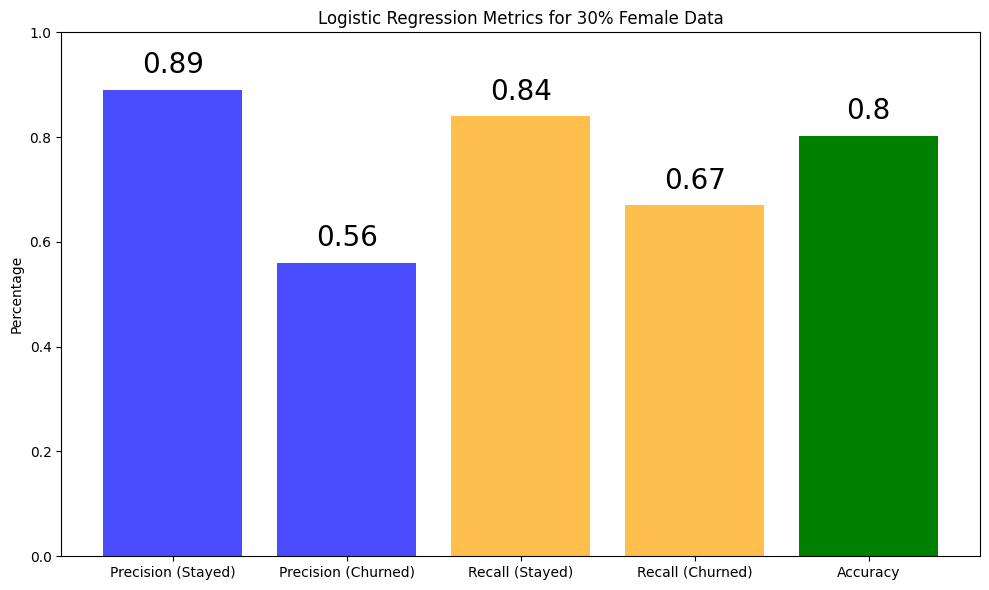

Figure 3: This is the histogram for the Logistic Regression metrics for the 30% female dataset:


In [244]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the 30% female dataset
labels = ["Precision (Stayed)", "Precision (Churned)", "Recall (Stayed)", "Recall (Churned)", "Accuracy"]
female_values = [0.89, 0.56, 0.84, 0.67, 0.8030513176144244]

# Plotting the histogram for the 30% female dataset
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, female_values, color=['blue', 'blue', 'orange', 'orange', 'green'])

# Highlighting bars
bars[0].set_alpha(0.7)
bars[1].set_alpha(0.7)
bars[2].set_alpha(0.7)
bars[3].set_alpha(0.7)

# Setting title and labels
ax.set_title("Logistic Regression Metrics for 30% Female Data")
ax.set_ylabel("Percentage")
ax.set_ylim(0, 1)

# Displaying the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()
# Caption:
print("Figure 3: This is the histogram for the Logistic Regression metrics for the 30% female dataset:")

Here's the histogram for the Logistic Regression metrics for the 30% female dataset. The metrics are color-coded for easy interpretation: Blue: Precision values
Orange: Recall values
Green: Accuracy value

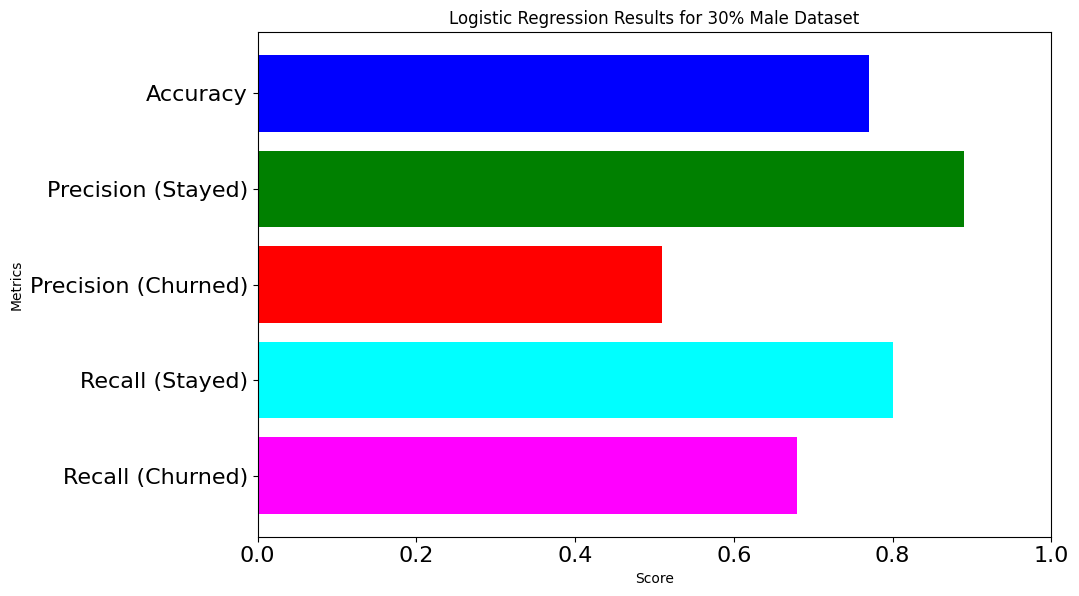

Figure 4: This is the histogram for the Logistic Regression results on the 30% male dataset:


In [245]:
# Logistic Regression Results for the 30% male dataset

# Metrics for "Stayed" (0) and "Churned" (1) categories
labels = ['Accuracy', 'Precision (Stayed)', 'Precision (Churned)', 'Recall (Stayed)', 'Recall (Churned)']
values_male_30_percent = [0.77, 0.89, 0.51, 0.80, 0.68]

plt.figure(figsize=(10, 6))
plt.barh(labels, values_male_30_percent, color=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.xlabel('Score')
plt.ylabel('Metrics')
plt.title('Logistic Regression Results for 30% Male Dataset')
plt.xlim(0, 1)
plt.tight_layout()
plt.tick_params(axis='both', labelsize=16)
plt.gca().invert_yaxis()
plt.show()

# Caption:
print("Figure 4: This is the histogram for the Logistic Regression results on the 30% male dataset:")

the histogram for the Logistic Regression results on the 30% male dataset:

The model achieved an accuracy of 77%.
Precision for customers who stayed (labelled "0") is 89%, while for those who churned (labelled "1") is 51%.
Recall for customers who stayed is 80%, and for those who churned is 68%

Creating Bias 4: Now, Let's systematically remove some percentage of records for the "Female" gender in MCAR way and increase the number of records for the "Male" gender by the same count to maintain the dataset's size. After this, we will repeat the process for the "Male" gender. Now 40% bias.

In [246]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')

def create_bias_mcar(data, bias_gender, percentage=40):
    # Calculate the number of records to modify
    count_to_modify = int(len(data[data['Gender'] == bias_gender]) * (percentage / 100))

    # Remove 40% of records for the specified gender
    biased_data = data.drop(data[data['Gender'] == bias_gender].sample(n=count_to_modify).index)

    # Calculate the number of additional records needed for the other gender
    additional_records = count_to_modify

    # Generate additional records with missing values for the other gender
    additional_data = pd.DataFrame()
    additional_data['Gender'] = ['Male'] * additional_records if bias_gender == 'Female' else ['Female'] * additional_records
    additional_data['Customer Status'] = ['No'] * additional_records

    # Create additional records with completely missing values for features for MCAR approach
    for col in data.columns[2:]:
        additional_data[col] = np.nan

    # Concatenate the data
    biased_data = pd.concat([biased_data, additional_data], axis=0).reset_index(drop=True)

    return biased_data

# Create bias for Female gender using Missing Completely at Random (MCAR) approach
biased_data_female_mcar_40 = create_bias_mcar(data, 'Female', percentage=40)

# Save the biased dataset for Female gender
biased_data_female_mcar_40.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_mcar_40%.csv', index=False)

# Create bias for Male gender using Missing Completely at Random (MCAR) approach
biased_data_male_mcar_40 = create_bias_mcar(data, 'Male', percentage=40)

# Save the biased dataset for Male gender
biased_data_male_mcar_40.to_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_mcar_40%.csv', index=False)


we have succesfully created 40% bias for both male and female in the dataset in MCAR way. the new dataset were also saved for both gender seperately. we will now proceed with model building and result evaluations.

Next is Model Building For 40% Biasnes

In [247]:
# Load the biased datasets
missing_40_female_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_female_mcar_40%.csv')

In [248]:
missing_40_male_df = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_biased_male_mcar_40%.csv')

In [249]:
# Extract numerical and categorical features for both datasets
cate_features_40_female = [col for col in missing_40_female_df.columns if missing_40_female_df[col].dtype == 'object']
cate_features_40_male = [col for col in missing_40_male_df.columns if missing_40_male_df[col].dtype == 'object']

In [250]:
# To ensure 'Customer Status' is not in the list of categorical features
cate_features_40_female = [col for col in cate_features_40_female if col != 'Customer Status']
cate_features_40_male = [col for col in cate_features_40_male if col != 'Customer Status']

In [251]:
num_features_40_female = [col for col in missing_40_female_df.columns if missing_40_female_df[col].dtype != 'object']
num_features_40_male = [col for col in missing_40_male_df.columns if missing_40_male_df[col].dtype != 'object']

In [252]:
# Mean encoding on the categorical features
# For Female dataset
churned_df_cat_40_female = missing_40_female_df[cate_features_40_female].copy()
churned_df_cat_40_female['Customer Status'] = missing_40_female_df['Customer Status'].map({"Churned": 1, "Stayed": 0})
for col in cate_features_40_female:
    dict40_female = churned_df_cat_40_female.groupby([col])['Customer Status'].mean().to_dict()
    churned_df_cat_40_female[col] = churned_df_cat_40_female[col].map(dict40_female)

In [253]:
churned_df_cat_30_male = missing_40_male_df[cate_features_40_male].copy()

In [254]:
churned_40_ml_data_male = missing_40_male_df[cate_features_40_male].copy()

In [255]:
churned_40_ml_data_female = pd.concat([churned_df_cat_40_female, missing_40_female_df[num_features_40_female]], axis=1)
print(type(churned_40_ml_data_female))
print(type(churned_40_ml_data_male))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [256]:
churned_40_ml_data_female = pd.DataFrame(churned_40_ml_data_female)

In [257]:
#Checking and resolvong any missing values again
from sklearn.impute import SimpleImputer

In [258]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

In [259]:
# Apply the imputer to our data
X_20train_female_imputed = imputer.fit_transform(X_20train_female)
X_20test_female_imputed = imputer.transform(X_20test_female)

In [260]:
missing_40_female_df.isnull().sum()

Customer ID                          1310
Gender                                  0
Age                                  1310
Married                              1310
Number of Dependents                 1310
City                                 1310
Zip Code                             1310
Number of Referrals                  1310
Tenure in Months                     1310
Offer                                1310
Phone Service                        1310
Avg Monthly Long Distance Charges    1310
Multiple Lines                       1310
Internet Service                     1310
Internet Type                        1310
Avg Monthly GB Download              1310
Online Security                      1310
Online Backup                        1310
Device Protection Plan               1310
Premium Tech Support                 1310
Streaming TV                         1310
Streaming Movies                     1310
Streaming Music                      1310
Unlimited Data                    

In [261]:
# Target column (Customer Status) for the female dataset
y_40_female = churned_40_ml_data_female.iloc[:, -1]

In [262]:
# Target column (Customer Status) for the male dataset
y_40_male = churned_40_ml_data_male.iloc[:, -1]

In [263]:
y_40_female


0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
6549    NaN
6550    NaN
6551    NaN
6552    NaN
6553    NaN
Name: Customer Status, Length: 6554, dtype: float64

In [264]:
y_40_male

0           Credit Card
1           Credit Card
2       Bank Withdrawal
3           Credit Card
4           Credit Card
             ...       
6549                NaN
6550                NaN
6551                NaN
6552                NaN
6553                NaN
Name: Payment Method, Length: 6554, dtype: object

In [265]:
df_female = data[data['Gender'] == 'Female'].copy()

In [266]:
X_40_female = df_female.drop('Customer Status', axis=1)
y_40_female = df_female['Customer Status']


In [267]:
y_40_female = df_female['Customer Status'].copy()
X_40_female = df_female.drop('Customer Status', axis=1)

In [268]:
#Model Building
# Logistic Rergression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [269]:
# Building Logistic Regression for Male data
logreg_male40 = LogisticRegression()
logreg_female40 = LogisticRegression()
logreg_male.fit(X_20train_male, y_20train_male)
logreg_female.fit(X_20train_female, y_20train_female)
y_40pred_male_logreg = logreg_male.predict(X_20test_male)
y_40pred_female_logreg = logreg_female.predict(X_20test_female)
print("Accuracy for Male data (Logistic Regression):", accuracy_score(y_40pred_male_logreg, y_20test_male))
target_names = ['0', '1']
print("Accuracy for Female data (Logistic Regression):", accuracy_score(y_40pred_female_logreg, y_20test_female))
target_names = ['0', '1']
print(classification_report(y_40pred_male_logreg, y_20test_male, target_names=target_names))
print(classification_report(y_40pred_female_logreg, y_20test_female, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Male data (Logistic Regression): 0.8100686498855835
Accuracy for Female data (Logistic Regression): 0.7894736842105263
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1026
           1       0.55      0.72      0.62       285

    accuracy                           0.81      1311
   macro avg       0.73      0.78      0.75      1311
weighted avg       0.84      0.81      0.82      1311

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1018
           1       0.52      0.68      0.59       293

    accuracy                           0.79      1311
   macro avg       0.71      0.75      0.72      1311
weighted avg       0.81      0.79      0.80      1311



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


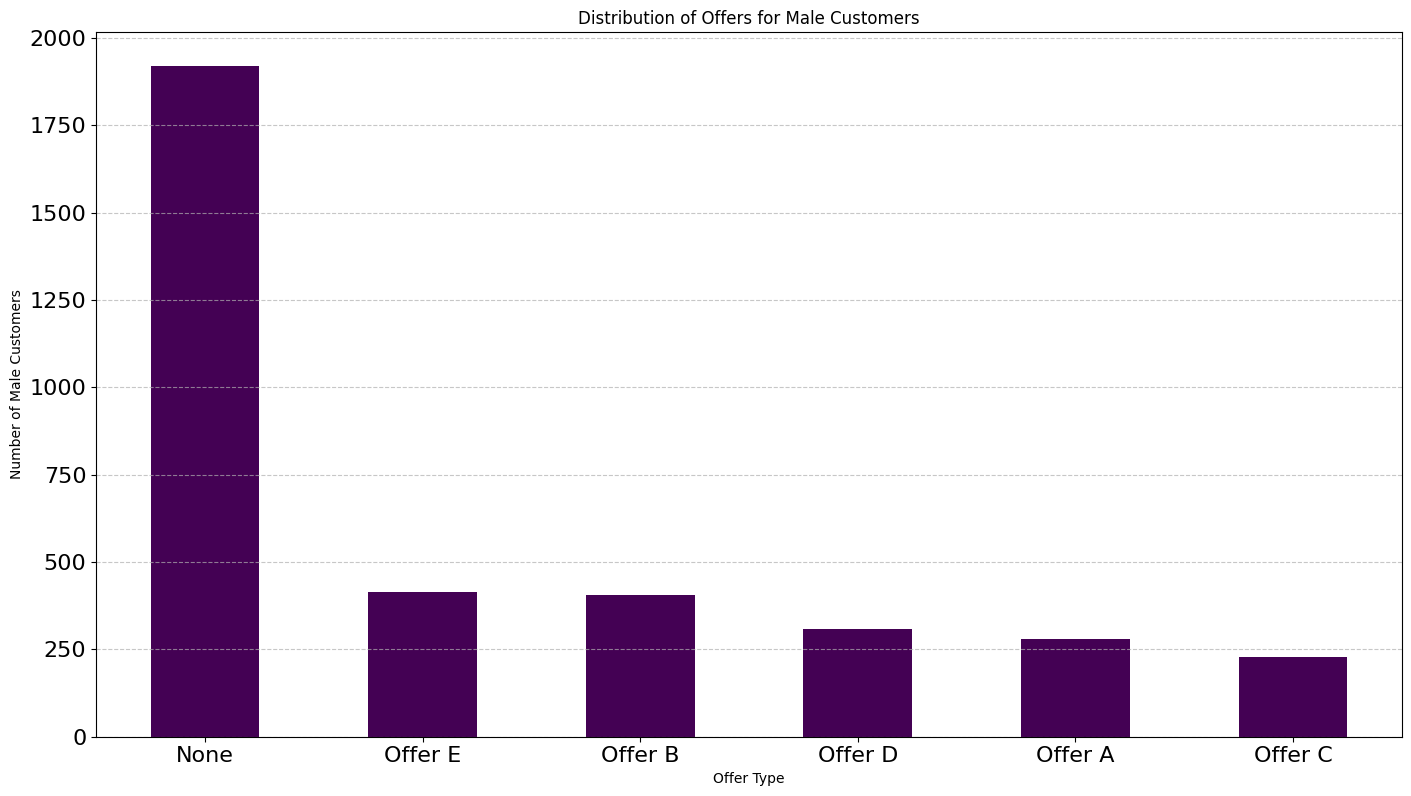

Figure 1: This bar chart depicts the distribution of various offers among male customers. It helps understand the preferences or targeting strategies specifically aimed at the male demographic.


In [270]:
import matplotlib.pyplot as plt

# Analyzing the distribution of offers for males
male_offer_distribution = telco_df[telco_df['Gender'] == 'Male']['Offer'].value_counts()

# Plotting the distribution for males
male_offer_distribution.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Offers for Male Customers')
plt.xlabel('Offer Type')
plt.ylabel('Number of Male Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.tick_params(axis='both', labelsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Caption:
print("Figure 1: This bar chart depicts the distribution of various offers among male customers. It helps understand the preferences or targeting strategies specifically aimed at the male demographic.")


fig.1 This bar chart depicts the distribution of various offers among male customers. It helps understand the preferences or targeting strategies specifically aimed at the male demographic

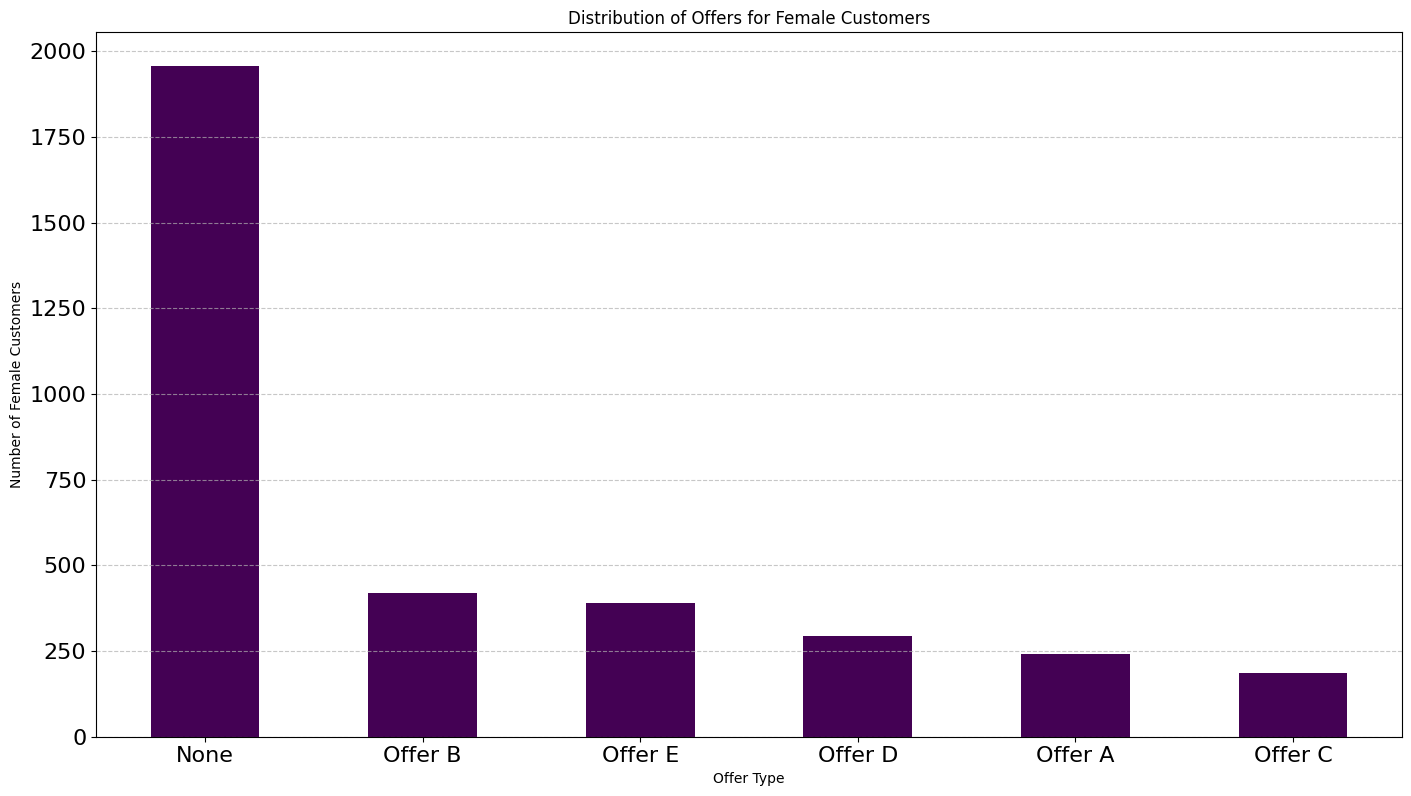

Figure 2: This bar chart showcases the distribution of various offers among female customers. It provides insights into the preferences or targeting strategies tailored for the female demographic.


In [271]:
# Analyzing the distribution of offers for females
female_offer_distribution = telco_df[telco_df['Gender'] == 'Female']['Offer'].value_counts()

# Plotting the distribution for females
female_offer_distribution.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Offers for Female Customers')
plt.xlabel('Offer Type')
plt.ylabel('Number of Female Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.tick_params(axis='both', labelsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Caption:
print("Figure 2: This bar chart showcases the distribution of various offers among female customers. It provides insights into the preferences or targeting strategies tailored for the female demographic.")


<Figure size 1200x800 with 0 Axes>

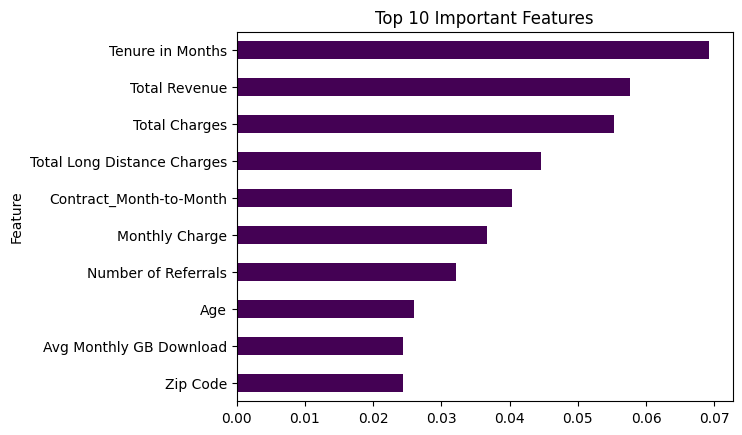

Figure 3: The visual representation showcases the top 10 significant features as determined by the Random Forest classifier.


In [272]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load and encode data
data = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')
X = pd.get_dummies(data.drop(columns=['Gender', 'Customer Status']))
y = data['Customer Status']

# Train Random Forest
rf = RandomForestClassifier().fit(X, y)

# Visualize top 10 important features
features = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
features.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False, colormap='viridis')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

#caption
print("Figure 3: The visual representation showcases the top 10 significant features as determined by the Random Forest classifier.")


In [273]:
data = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')

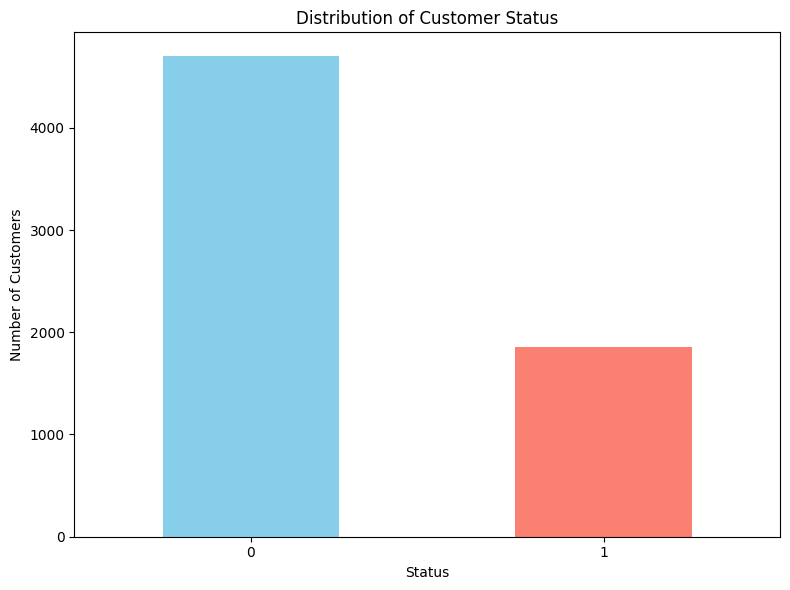

In [274]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the newly uploaded dataset
data_new = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')

# Analyze the distribution of values in the 'Customer Status' column
customer_status_distribution = data_new['Customer Status'].value_counts()

# Visualize the distribution
plt.figure(figsize=(8, 6))
customer_status_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Customer Status')
plt.xlabel('Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Here's the distribution of the "Customer Status" column on the modifed dataset: Churned: Represents customers who have left the company.
Stayed: Represents customers who have continued their association with the company

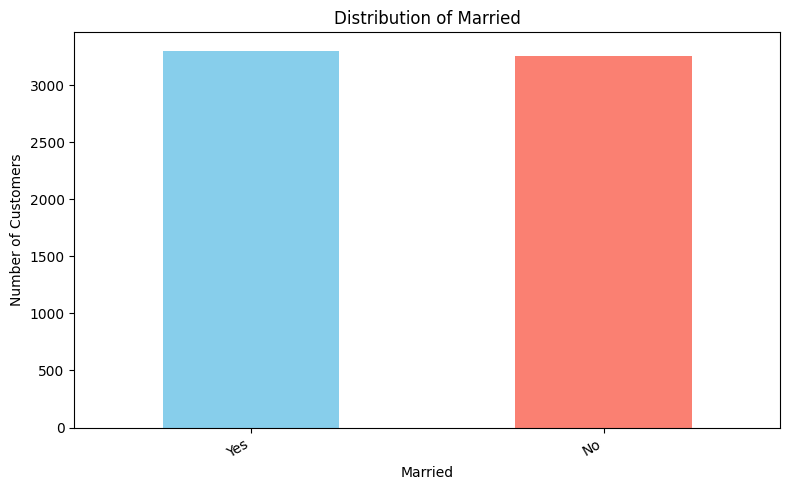

In [275]:
# Function to visualize the distribution of a categorical column
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# Load the newly uploaded dataset
data_new = pd.read_csv('/content/drive/MyDrive/COM865-Projectfile/telecom_modified_new_50+50.csv')
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(8, 5))
    data_new[column_name].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'Distribution of {column_name}')
    plt.ylabel('Number of Customers')
    plt.xlabel(column_name)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

# Visualizing the distribution for the first column "Married"
plot_categorical_distribution('Married')


Here's the visual distribution for the "Married" column:

Single: Represents customers who are not married. Married: Represents customers who are married. The dataset has more single customers than married ones.

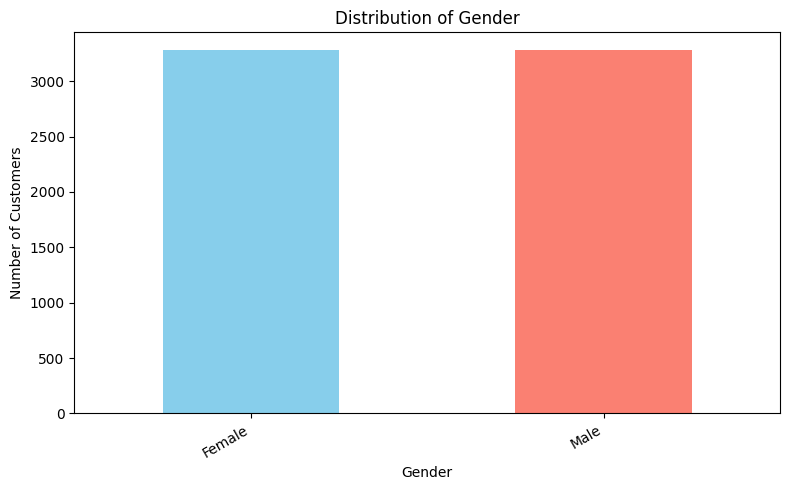

In [276]:
# Visualizing the distribution for the "Gender" column
plot_categorical_distribution('Gender')


Here's the visual distribution for the "Gender" column:
Male: Represents the male customers in the dataset. Female: Represents the female customers in the dataset. As observed, the dataset is balanced with an almost equal distribution of male and female customers. This balanced gender distribution is essential for unbiased analyses, especially when studying potential gender biases in other aspects of the datase